<div id="container" style="position:relative;">
<div style="float:left"><h1> Forecasting Bakery Sales - Abi Magnall </h1></div>
<div style="position:relative; float:right"><img style="height:65px" src ="https://twomagpiesbakery.co.uk/wp-content/uploads/2020/11/logo-no-site.jpg" />
</div>
</div>

# Notebook 4 : Bakery Data Preprocessing

This notebook will import all the clean shop datasets, combine them with the other relevant and exogenous data tables that are being explored in this modelling, such as `CPI` and `Weather` data. 

A high level overview of the steps taken in the preprocessing are shown below. 

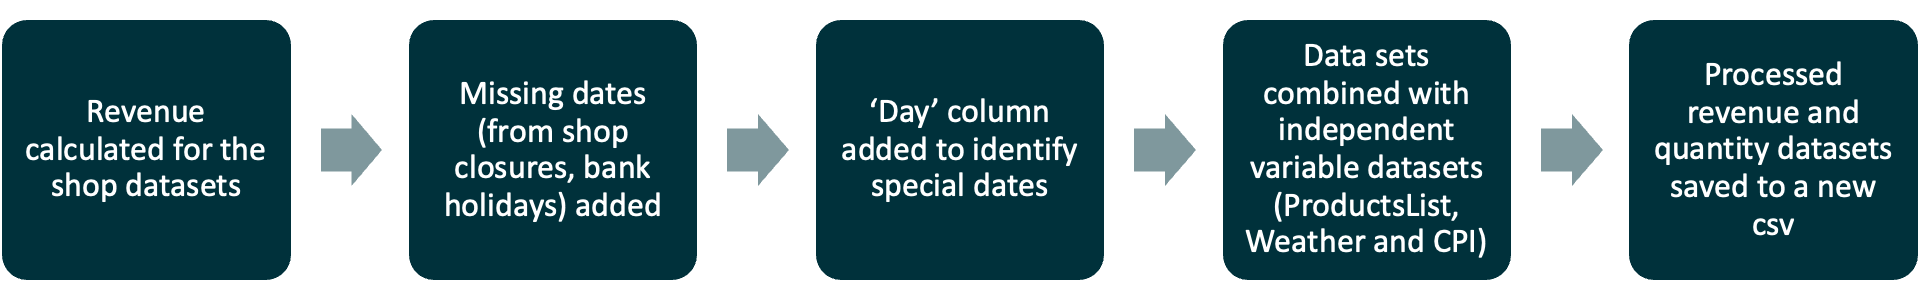

---

# Contents 
     
1. [Part 1: Cleaning and Processing Datasets](#Part-1-:-Cleaning-and-Processing-Datasets)
      - [Adding Revenue Column to Shop Datasets](#Adding-Revenue-Column-to-Shop-Datasets)
      - [Validating Revenue Column](#Validating-Revenue-Column)


2. [Part 2 : Creating Revenue Dataset](#Part-2-:-Creating-Revenue-Dataset)
      - [Adding `Day` Column and Filling Missing Dates for Aldeburgh Dataset](#Adding-Day-Column-and-Filling-Missing-Dates-for-Aldeburgh-Dataset) 
      - [Adding `Day` Column and Filling Missing Dates for Southwold Dataset](#Adding-Day-Column-and-Filling-Missing-Dates-for-Southwold-Dataset) 
      - [Adding `Day` Column and Filling Missing Dates for Darsham Dataset](#Adding-Day-Column-and-Filling-Missing-Dates-for-Darsham-Dataset) 
      - [Adding `Day` Column and Filling Missing Dates for Norwich Dataset](#Adding-Day-Column-and-Filling-Missing-Dates-for-Norwich-Dataset) 
      - [Combining the Datasets](#Combining-the-Datasets)
      - [Adding `Total_Revenue` Column](#Adding-Total_Revenue-Column)
      

3. [Part 3 : Creating Datasets for Market Basket Analysis](#Part-3-:-Creating-Datasets-for-Market-Basket-Analysis)


4. [Part 4 : Creating Quantity Datasets](#Part-4-:-Creating-Quantity-Datasets)
      - [Merging Products List with Shop Datasets](#Merging-Products-List-with-Shop-Datasets) 
      - [Adding Missing Dates to All Shop Datasets](#Adding-Missing-Dates-to-All-Shop-Datasets)
      - [Adding the Independent Variables](#Adding-the-Independent-Variables)
      - [Combining to One Total Dataset](#Combining-to-One-Total-Dataset)
 
 
5. [Part 5 : Creating Dataset for Dashboard](#Part-5-:-Creating-Dataset-for-Dashboard)


6. [Preprocessing Summary](#Preprocessing-Summary)


7. [Next Steps](#Next-Steps)

---

## Importing Libraries

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os
import datetime as dt
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder

## Importing Custom Functions

In [131]:
import BakeryFunctions as bakery

## To Get Current Directory

In [132]:
working_directory = os.getcwd()
working_directory

'/Users/abimagnall/Documents/BrainStation/Capstone/Data/Abi_Magnall_Captsone_Project'

## Importing Clean Datasets

### School Holidays Dataset

In [133]:
school_hols = pd.read_csv(working_directory+'/3_preprocessed_data/school_holidays.csv')

### Shop Transactions Datasets

In [134]:
aldeburgh_clean = pd.read_csv(working_directory+'/2_clean_data/aldeburgh_clean.csv')
display(aldeburgh_clean.head())
southwold_clean = pd.read_csv(working_directory+'/2_clean_data/southwold_clean.csv')
display(southwold_clean.head())
darsham_clean = pd.read_csv(working_directory+'/2_clean_data/darsham_clean.csv')
display(darsham_clean.head())
norwich_clean = pd.read_csv(working_directory+'/2_clean_data/norwich_clean.csv')
display(norwich_clean.head())

,TransactionId,ProductId,UnitPrice,Quantity,DiscountAmount,DiscountReasonId,RefundReasonId,Date
0,325356083,21567882,3.2,1,0.00,0.0,0.0,2020-09-01
1,325399103,1677432,2.6,1,0.00,0.0,0.0,2020-09-01
2,325400582,20505962,4.5,1,2.25,13524.0,0.0,2020-09-01
3,325400582,15137944,1.8,1,0.00,0.0,0.0,2020-09-01
4,325403315,20405549,3.4,1,0.00,0.0,0.0,2020-09-01


,TransactionId,ProductId,UnitPrice,Quantity,DiscountAmount,DiscountReasonId,RefundReasonId,Date
0,368108160,1677386,2.60,1,0.0,0.0,0.0,2021-07-01
1,368116614,1677402,2.85,1,0.0,0.0,0.0,2021-07-01
2,368121026,1677395,2.70,1,0.0,0.0,0.0,2021-07-01
3,368121026,9262077,2.40,1,0.0,0.0,0.0,2021-07-01
4,368121026,1677551,2.00,1,0.0,0.0,0.0,2021-07-01


,TransactionId,ProductId,UnitPrice,Quantity,DiscountAmount,DiscountReasonId,RefundReasonId,Date
0,368107752,1677554,2.2,1,0.0,0.0,0.0,2021-07-01
1,368107752,1677387,2.9,1,0.0,0.0,0.0,2021-07-01
2,368107986,1677480,3.9,1,0.0,0.0,0.0,2021-07-01
3,368107986,7243504,2.5,1,0.0,0.0,0.0,2021-07-01
4,368107986,1677539,1.7,1,0.0,0.0,0.0,2021-07-01


,TransactionId,ProductId,UnitPrice,Quantity,DiscountAmount,DiscountReasonId,RefundReasonId,Date
0,368106886,17865562,2.50,1,0.0,0.0,0.0,2021-07-01
1,368106886,1677415,2.30,1,0.0,0.0,0.0,2021-07-01
2,368106886,1677402,2.85,1,0.0,0.0,0.0,2021-07-01
3,368107620,1677426,2.90,1,0.0,0.0,0.0,2021-07-01
4,368107620,1677674,3.20,1,0.0,0.0,0.0,2021-07-01


### Products List Dataset

In [135]:
products_list = pd.read_csv(working_directory+'/3_preprocessed_data/ProcessedProducts.csv')
products_list.head()

,Name,ProductId,ProductName
0,PORRIDGE T/O,1677377,Remove
1,PORRIDGE E/I,1677378,Remove
2,TOAST & JAM E/I,1677384,Remove
3,LATTE REG T/O,1677386,Coffee
4,LATTE LARGE T/O,1677387,Coffee


### Weather Dataset

In [136]:
weather = pd.read_csv(working_directory+'/3_preprocessed_data/processed_weather.csv')
weather.head()

,Date,TAVG,PRCP
0,2020-09-01,24,0.00
1,2020-09-02,27,0.00
2,2020-09-03,31,0.07
3,2020-09-04,27,0.08
4,2020-09-05,23,0.01


### CPI Dataset

In [137]:
cpi = pd.read_csv(working_directory+'/3_preprocessed_data/CPI_processed_data.csv')
cpi.head()

,Date,"CPI INDEX 04.5 : ELECTRICITY, GAS AND OTHER FUELS 2015=100",CPI INDEX 01.1 : FOOD 2015=100
0,30/09/2020,107.6,102.8
1,31/10/2020,100.6,102.9
2,30/11/2020,100.5,102.9
3,31/12/2020,100.9,102.3
4,31/01/2021,101.1,102.8


## Variables

In [138]:
shops = [aldeburgh_clean, darsham_clean, norwich_clean, southwold_clean]

# Part 1 : Cleaning and Processing Datasets
The steps taken in this cleaning and processing section include: 
- Basic intital EDA to identify areas of missing, duplicated or incorrect data types
- Convert the `Date` column to DateTime
- Renaming columns to be more simple 
- Adding the `Revenue` column
- Saving a copy for audit trail purposes
- Saving a version of the combined revenue with the `ShopId` for the revenue dashboard 

## Cleaning of Shop Datasets
The `basic_eda` function will be called on the shop datasets to confirm that there are no missing or duplicated or incorrect datatypes. 

In [139]:
for shop in shops:
    bakery.basic_eda(shop)

The number of duplicated rows are: 0

The number of missing values are: 
TransactionId       0
ProductId           0
UnitPrice           0
Quantity            0
DiscountAmount      0
DiscountReasonId    0
RefundReasonId      0
Date                0
dtype: int64



,TransactionId,ProductId,UnitPrice,Quantity,DiscountAmount,DiscountReasonId,RefundReasonId,Date
0,325356083,21567882,3.2,1,0.00,0.0,0.0,2020-09-01
1,325399103,1677432,2.6,1,0.00,0.0,0.0,2020-09-01
2,325400582,20505962,4.5,1,2.25,13524.0,0.0,2020-09-01
3,325400582,15137944,1.8,1,0.00,0.0,0.0,2020-09-01
4,325403315,20405549,3.4,1,0.00,0.0,0.0,2020-09-01


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643971 entries, 0 to 643970
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   TransactionId     643971 non-null  int64  
 1   ProductId         643971 non-null  int64  
 2   UnitPrice         643971 non-null  float64
 3   Quantity          643971 non-null  int64  
 4   DiscountAmount    643971 non-null  float64
 5   DiscountReasonId  643971 non-null  float64
 6   RefundReasonId    643971 non-null  float64
 7   Date              643971 non-null  object 
dtypes: float64(4), int64(3), object(1)
memory usage: 39.3+ MB


None

The number of duplicated rows are: 0

The number of missing values are: 
TransactionId       0
ProductId           0
UnitPrice           0
Quantity            0
DiscountAmount      0
DiscountReasonId    0
RefundReasonId      0
Date                0
dtype: int64



,TransactionId,ProductId,UnitPrice,Quantity,DiscountAmount,DiscountReasonId,RefundReasonId,Date
0,368107752,1677554,2.2,1,0.0,0.0,0.0,2021-07-01
1,368107752,1677387,2.9,1,0.0,0.0,0.0,2021-07-01
2,368107986,1677480,3.9,1,0.0,0.0,0.0,2021-07-01
3,368107986,7243504,2.5,1,0.0,0.0,0.0,2021-07-01
4,368107986,1677539,1.7,1,0.0,0.0,0.0,2021-07-01


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503250 entries, 0 to 503249
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   TransactionId     503250 non-null  int64  
 1   ProductId         503250 non-null  int64  
 2   UnitPrice         503250 non-null  float64
 3   Quantity          503250 non-null  int64  
 4   DiscountAmount    503250 non-null  float64
 5   DiscountReasonId  503250 non-null  float64
 6   RefundReasonId    503250 non-null  float64
 7   Date              503250 non-null  object 
dtypes: float64(4), int64(3), object(1)
memory usage: 30.7+ MB


None

The number of duplicated rows are: 0

The number of missing values are: 
TransactionId       0
ProductId           0
UnitPrice           0
Quantity            0
DiscountAmount      0
DiscountReasonId    0
RefundReasonId      0
Date                0
dtype: int64



,TransactionId,ProductId,UnitPrice,Quantity,DiscountAmount,DiscountReasonId,RefundReasonId,Date
0,368106886,17865562,2.50,1,0.0,0.0,0.0,2021-07-01
1,368106886,1677415,2.30,1,0.0,0.0,0.0,2021-07-01
2,368106886,1677402,2.85,1,0.0,0.0,0.0,2021-07-01
3,368107620,1677426,2.90,1,0.0,0.0,0.0,2021-07-01
4,368107620,1677674,3.20,1,0.0,0.0,0.0,2021-07-01


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279145 entries, 0 to 279144
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   TransactionId     279145 non-null  int64  
 1   ProductId         279145 non-null  int64  
 2   UnitPrice         279145 non-null  float64
 3   Quantity          279145 non-null  int64  
 4   DiscountAmount    279145 non-null  float64
 5   DiscountReasonId  279145 non-null  float64
 6   RefundReasonId    279145 non-null  float64
 7   Date              279145 non-null  object 
dtypes: float64(4), int64(3), object(1)
memory usage: 17.0+ MB


None

The number of duplicated rows are: 0

The number of missing values are: 
TransactionId       0
ProductId           0
UnitPrice           0
Quantity            0
DiscountAmount      0
DiscountReasonId    0
RefundReasonId      0
Date                0
dtype: int64



,TransactionId,ProductId,UnitPrice,Quantity,DiscountAmount,DiscountReasonId,RefundReasonId,Date
0,368108160,1677386,2.60,1,0.0,0.0,0.0,2021-07-01
1,368116614,1677402,2.85,1,0.0,0.0,0.0,2021-07-01
2,368121026,1677395,2.70,1,0.0,0.0,0.0,2021-07-01
3,368121026,9262077,2.40,1,0.0,0.0,0.0,2021-07-01
4,368121026,1677551,2.00,1,0.0,0.0,0.0,2021-07-01


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552755 entries, 0 to 552754
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   TransactionId     552755 non-null  int64  
 1   ProductId         552755 non-null  int64  
 2   UnitPrice         552755 non-null  float64
 3   Quantity          552755 non-null  int64  
 4   DiscountAmount    552755 non-null  float64
 5   DiscountReasonId  552755 non-null  float64
 6   RefundReasonId    552755 non-null  float64
 7   Date              552755 non-null  object 
dtypes: float64(4), int64(3), object(1)
memory usage: 33.7+ MB


None

It can be seen in the clean datasets that there are no missing or duplicated values, however the `Date` column is the wrong data type and must be converted to DateTime. 

In [140]:
for shop in shops:
    bakery.convert_date(shop)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643971 entries, 0 to 643970
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   TransactionId     643971 non-null  int64         
 1   ProductId         643971 non-null  int64         
 2   UnitPrice         643971 non-null  float64       
 3   Quantity          643971 non-null  int64         
 4   DiscountAmount    643971 non-null  float64       
 5   DiscountReasonId  643971 non-null  float64       
 6   RefundReasonId    643971 non-null  float64       
 7   Date              643971 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(3)
memory usage: 39.3 MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503250 entries, 0 to 503249
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   TransactionId     503250 non-null  int64         
 1   ProductId         503250 non-null  int64         
 2   UnitPrice         503250 non-null  float64       
 3   Quantity          503250 non-null  int64         
 4   DiscountAmount    503250 non-null  float64       
 5   DiscountReasonId  503250 non-null  float64       
 6   RefundReasonId    503250 non-null  float64       
 7   Date              503250 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(3)
memory usage: 30.7 MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279145 entries, 0 to 279144
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   TransactionId     279145 non-null  int64         
 1   ProductId         279145 non-null  int64         
 2   UnitPrice         279145 non-null  float64       
 3   Quantity          279145 non-null  int64         
 4   DiscountAmount    279145 non-null  float64       
 5   DiscountReasonId  279145 non-null  float64       
 6   RefundReasonId    279145 non-null  float64       
 7   Date              279145 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(3)
memory usage: 17.0 MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552755 entries, 0 to 552754
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   TransactionId     552755 non-null  int64         
 1   ProductId         552755 non-null  int64         
 2   UnitPrice         552755 non-null  float64       
 3   Quantity          552755 non-null  int64         
 4   DiscountAmount    552755 non-null  float64       
 5   DiscountReasonId  552755 non-null  float64       
 6   RefundReasonId    552755 non-null  float64       
 7   Date              552755 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(3)
memory usage: 33.7 MB


None

## Cleaning of School Holidays Dataset
The `basic_eda` function will be called on the holidays dataset to confirm that there are no missing or duplicated or incorrect datatypes. 

In [141]:
bakery.basic_eda(school_hols)

The number of duplicated rows are: 0

The number of missing values are: 
School Holiday    1
Date              1
dtype: int64



,School Holiday,Date
0,School Holiday,24/10/2020
1,School Holiday,25/10/2020
2,School Holiday,26/10/2020
3,School Holiday,27/10/2020
4,School Holiday,28/10/2020


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   School Holiday  221 non-null    object
 1   Date            221 non-null    object
dtypes: object(2)
memory usage: 3.6+ KB


None

It can be seen that there are no missing or duplciated values. However, the `Date` column is the incorrect data type and must be convereted to DateTime. 

In [142]:
# Converting Date column to DateTime
bakery.convert_date(school_hols, date_format = '%d/%m/%Y')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   School Holiday  221 non-null    object        
 1   Date            221 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 3.6+ KB


None

## Cleaning of CPI Data
The `basic_eda` function will be called on the CPI dataset to confirm that there are no missing or duplicated or incorrect datatypes. 

In [143]:
cpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Date                                                        25 non-null     object 
 1   CPI INDEX 04.5 : ELECTRICITY, GAS AND OTHER FUELS 2015=100  25 non-null     float64
 2   CPI INDEX 01.1 : FOOD 2015=100                              25 non-null     float64
dtypes: float64(2), object(1)
memory usage: 728.0+ bytes


In [144]:
bakery.basic_eda(cpi)

The number of duplicated rows are: 0

The number of missing values are: 
Date                                                          0
CPI INDEX 04.5 : ELECTRICITY, GAS AND OTHER FUELS 2015=100    0
CPI INDEX 01.1 : FOOD 2015=100                                0
dtype: int64



,Date,"CPI INDEX 04.5 : ELECTRICITY, GAS AND OTHER FUELS 2015=100",CPI INDEX 01.1 : FOOD 2015=100
0,30/09/2020,107.6,102.8
1,31/10/2020,100.6,102.9
2,30/11/2020,100.5,102.9
3,31/12/2020,100.9,102.3
4,31/01/2021,101.1,102.8


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Date                                                        25 non-null     object 
 1   CPI INDEX 04.5 : ELECTRICITY, GAS AND OTHER FUELS 2015=100  25 non-null     float64
 2   CPI INDEX 01.1 : FOOD 2015=100                              25 non-null     float64
dtypes: float64(2), object(1)
memory usage: 728.0+ bytes


None

There are no missing or duplicated values in the CPI dataset. However, the `Date` column is the incorrect data type, therefore must be converted to DateTime. 

In [145]:
# Converting Date column to DateTime
bakery.convert_date(cpi, date_format='%d/%m/%Y')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column                                                      Non-Null Count  Dtype         
---  ------                                                      --------------  -----         
 0   Date                                                        25 non-null     datetime64[ns]
 1   CPI INDEX 04.5 : ELECTRICITY, GAS AND OTHER FUELS 2015=100  25 non-null     float64       
 2   CPI INDEX 01.1 : FOOD 2015=100                              25 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 728.0 bytes


None

The column names will also be renamed to simpler versions.

In [146]:
bakery.rename_col(cpi, 'CPI INDEX 04.5 : ELECTRICITY, GAS AND OTHER FUELS 2015=100', 'CPI_Electricity' )
bakery.rename_col(cpi, 'CPI INDEX 01.1 : FOOD 2015=100', 'CPI_Food' )

,Date,CPI_Electricity,CPI_Food
0,2020-09-30,107.6,102.8
1,2020-10-31,100.6,102.9
2,2020-11-30,100.5,102.9
3,2020-12-31,100.9,102.3
4,2021-01-31,101.1,102.8
5,2021-02-28,101.4,103.3
6,2021-03-31,101.5,102.5
7,2021-04-30,110.1,103.3
8,2021-05-31,110.2,103.0
9,2021-06-30,110.3,103.3


## Cleaning of Weather Data
The `basic_eda` function will be called on the weather dataset to confirm that there are no missing or duplicated or incorrect datatypes. 

In [147]:
bakery.basic_eda(weather)

The number of duplicated rows are: 0

The number of missing values are: 
Date    0
TAVG    0
PRCP    0
dtype: int64



,Date,TAVG,PRCP
0,2020-09-01,24,0.00
1,2020-09-02,27,0.00
2,2020-09-03,31,0.07
3,2020-09-04,27,0.08
4,2020-09-05,23,0.01


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    760 non-null    object 
 1   TAVG    760 non-null    int64  
 2   PRCP    760 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 17.9+ KB


None

There are no missing or duplicated values in the CPI dataset. However, the `Date` column is the incorrect data type, therefore must be converted to DateTime. 

In [148]:
bakery.convert_date(weather, date_format = '%Y/%m/%d')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    760 non-null    datetime64[ns]
 1   TAVG    760 non-null    int64         
 2   PRCP    760 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 17.9 KB


None

**Now all the datasets have no missing, duplicated or incorrect data types the processing can begin.**

---

# Adding `Revenue` Column to Shop Datasets
Another column needed for the modelling phase is the `Revenue` Column. The revenue is calculated by taking the `UnitPrice` and multiplying it by the `Quantity`, subtracting the `DiscountAmount` if present or is £0.00 if the `RefundReasonId` column is populated. 

This is done on a new copy of the shop dataset called `aldeburgh_df`, `southwold_df`, `darsham_df`, `norwich_df`.

In [149]:
aldeburgh_df = aldeburgh_clean.copy()
southwold_df = southwold_clean.copy()
darsham_df = darsham_clean.copy()
norwich_df = norwich_clean.copy()
shops_df = [aldeburgh_df, southwold_df, darsham_df, norwich_df]

The `revenue_calc` function is then called, which calculated the revenue per transaction line by multiplying the `UnitPrice` by the `Quantity`, subtracting the `DiscountAmount` if present or populating the `Revenue` as £0.00 if the `RefundReasonId` column is populated with a number greater than 0.0. 

In [150]:
for shop in shops_df:
    bakery.revenue_calc(shop)

,TransactionId,ProductId,UnitPrice,Quantity,DiscountAmount,DiscountReasonId,RefundReasonId,Date,Revenue
0,325356083,21567882,3.2,1,0.00,0.0,0.0,2020-09-01,3.20
1,325399103,1677432,2.6,1,0.00,0.0,0.0,2020-09-01,2.60
2,325400582,20505962,4.5,1,2.25,13524.0,0.0,2020-09-01,2.25
3,325400582,15137944,1.8,1,0.00,0.0,0.0,2020-09-01,1.80
4,325403315,20405549,3.4,1,0.00,0.0,0.0,2020-09-01,3.40


,TransactionId,ProductId,UnitPrice,Quantity,DiscountAmount,DiscountReasonId,RefundReasonId,Date,Revenue
0,368108160,1677386,2.60,1,0.0,0.0,0.0,2021-07-01,2.60
1,368116614,1677402,2.85,1,0.0,0.0,0.0,2021-07-01,2.85
2,368121026,1677395,2.70,1,0.0,0.0,0.0,2021-07-01,2.70
3,368121026,9262077,2.40,1,0.0,0.0,0.0,2021-07-01,2.40
4,368121026,1677551,2.00,1,0.0,0.0,0.0,2021-07-01,2.00


,TransactionId,ProductId,UnitPrice,Quantity,DiscountAmount,DiscountReasonId,RefundReasonId,Date,Revenue
0,368107752,1677554,2.2,1,0.0,0.0,0.0,2021-07-01,2.2
1,368107752,1677387,2.9,1,0.0,0.0,0.0,2021-07-01,2.9
2,368107986,1677480,3.9,1,0.0,0.0,0.0,2021-07-01,3.9
3,368107986,7243504,2.5,1,0.0,0.0,0.0,2021-07-01,2.5
4,368107986,1677539,1.7,1,0.0,0.0,0.0,2021-07-01,1.7


,TransactionId,ProductId,UnitPrice,Quantity,DiscountAmount,DiscountReasonId,RefundReasonId,Date,Revenue
0,368106886,17865562,2.50,1,0.0,0.0,0.0,2021-07-01,2.50
1,368106886,1677415,2.30,1,0.0,0.0,0.0,2021-07-01,2.30
2,368106886,1677402,2.85,1,0.0,0.0,0.0,2021-07-01,2.85
3,368107620,1677426,2.90,1,0.0,0.0,0.0,2021-07-01,2.90
4,368107620,1677674,3.20,1,0.0,0.0,0.0,2021-07-01,3.20


## Validating Revenue Column
- First to ensure that the refund and discount columns were calculated correctly a sample view from a shop will be taken
- To ensure there are no negative values (due to negative quantities or discount amounts that were missed in the cleaning) this will be tested 
- To validate the data was exported correctly and accurately from EposNow the full dataset revenue will be calculated and compared with the EposNow system to validate the amounts are correct

In [151]:
# Printing samples of the refund, discount and revenue columns to validate the rev_calc function worked correctly
for shop in shops_df:

    # Validate added correctly - if refund reason populated, revenue should be 0
    print('Sample revenue for refunded products: ')
    display(shop[shop['RefundReasonId'] > 0].head())

    # If discount amount greater than 0, revenue should be discounted
    print('Sample revenue for discounted products: ')
    display(shop[shop['DiscountAmount'] > 0].head())

    # To validate that there are no negative revenues
    print('The rows of data with negative Revenue: ')
    display(shop[shop['Revenue']<0])

Sample revenue for refunded products: 


,TransactionId,ProductId,UnitPrice,Quantity,DiscountAmount,DiscountReasonId,RefundReasonId,Date,Revenue
41,325377620,1677709,7.0,1,0.0,0.0,19849.0,2020-09-01,0.0
76,325371584,21644677,7.8,1,0.0,0.0,11273.0,2020-09-01,0.0
283,325382787,18610844,5.4,1,0.0,0.0,8378.0,2020-09-01,0.0
2225,325763436,21139182,3.8,2,0.0,0.0,8378.0,2020-09-03,0.0
2733,325675165,1677709,7.0,1,0.0,0.0,19849.0,2020-09-03,0.0


Sample revenue for discounted products: 


,TransactionId,ProductId,UnitPrice,Quantity,DiscountAmount,DiscountReasonId,RefundReasonId,Date,Revenue
2,325400582,20505962,4.5,1,2.25,13524.0,0.0,2020-09-01,2.25
56,325392792,13405911,2.5,1,1.25,13524.0,0.0,2020-09-01,1.25
57,325392792,1677480,3.8,1,1.90,13524.0,0.0,2020-09-01,1.90
115,325391002,1677480,3.8,1,1.90,13524.0,0.0,2020-09-01,1.90
119,325396632,13405911,2.5,1,1.25,13524.0,0.0,2020-09-01,1.25


The rows of data with negative Revenue: 


,TransactionId,ProductId,UnitPrice,Quantity,DiscountAmount,DiscountReasonId,RefundReasonId,Date,Revenue


Sample revenue for refunded products: 


,TransactionId,ProductId,UnitPrice,Quantity,DiscountAmount,DiscountReasonId,RefundReasonId,Date,Revenue
1319,368441960,1677674,3.2,2,0.0,0.0,19849.0,2021-07-02,0.0
2503,368724169,1677449,2.1,1,0.0,0.0,19849.0,2021-07-03,0.0
3534,369181626,1677544,2.0,1,0.0,0.0,19849.0,2021-07-05,0.0
3535,369181626,1677429,2.5,1,0.0,0.0,19849.0,2021-07-05,0.0
3831,369183076,1677480,4.0,1,0.0,0.0,19849.0,2021-07-05,0.0


Sample revenue for discounted products: 


,TransactionId,ProductId,UnitPrice,Quantity,DiscountAmount,DiscountReasonId,RefundReasonId,Date,Revenue
201,368110602,1677387,2.9,1,0.29,49063.0,0.0,2021-07-01,2.61
286,368116326,1677387,2.9,1,0.29,49063.0,0.0,2021-07-01,2.61
337,368112083,1677387,2.9,1,0.29,49063.0,0.0,2021-07-01,2.61
418,368115277,1677389,2.5,1,2.50,19614.0,0.0,2021-07-01,0.00
623,368222875,1677392,2.3,1,0.23,49063.0,0.0,2021-07-01,2.07


The rows of data with negative Revenue: 


,TransactionId,ProductId,UnitPrice,Quantity,DiscountAmount,DiscountReasonId,RefundReasonId,Date,Revenue


Sample revenue for refunded products: 


,TransactionId,ProductId,UnitPrice,Quantity,DiscountAmount,DiscountReasonId,RefundReasonId,Date,Revenue
572,368220893,1677430,2.8,2,0.0,0.0,19849.0,2021-07-01,0.0
573,368220893,5453567,2.9,1,0.0,0.0,19849.0,2021-07-01,0.0
574,368220893,1677540,2.2,1,0.0,0.0,19849.0,2021-07-01,0.0
576,368220893,8981483,1.9,1,0.0,0.0,19849.0,2021-07-01,0.0
577,368220893,1677674,3.2,1,0.0,0.0,19849.0,2021-07-01,0.0


Sample revenue for discounted products: 


,TransactionId,ProductId,UnitPrice,Quantity,DiscountAmount,DiscountReasonId,RefundReasonId,Date,Revenue
131,368114124,1677395,2.7,1,2.70,19614.0,0.0,2021-07-01,0.00
744,368330046,7559779,7.5,1,1.88,19615.0,0.0,2021-07-02,5.62
3550,369188569,1677430,2.8,1,2.80,19614.0,0.0,2021-07-05,0.00
3749,369152792,1677387,3.0,1,3.00,19614.0,0.0,2021-07-05,0.00
3809,369207926,1677449,2.1,1,2.10,19614.0,0.0,2021-07-05,0.00


The rows of data with negative Revenue: 


,TransactionId,ProductId,UnitPrice,Quantity,DiscountAmount,DiscountReasonId,RefundReasonId,Date,Revenue


Sample revenue for refunded products: 


,TransactionId,ProductId,UnitPrice,Quantity,DiscountAmount,DiscountReasonId,RefundReasonId,Date,Revenue
342,368360462,21918560,3.9,1,0.0,0.0,8378.0,2021-07-02,0.0
822,368361619,23282816,6.0,1,0.0,0.0,19849.0,2021-07-02,0.0
1701,369230884,23229545,5.5,1,0.0,0.0,19849.0,2021-07-05,0.0
2853,369793855,1677619,3.1,1,0.0,0.0,19849.0,2021-07-08,0.0
3048,370251933,5453567,3.0,1,0.0,0.0,19849.0,2021-07-10,0.0


Sample revenue for discounted products: 


,TransactionId,ProductId,UnitPrice,Quantity,DiscountAmount,DiscountReasonId,RefundReasonId,Date,Revenue
58,368199933,1677480,3.9,1,0.98,82086.0,0.0,2021-07-01,2.92
378,368191731,1677480,3.9,1,0.78,66076.0,0.0,2021-07-01,3.12
587,368419832,11948094,1.8,1,0.27,66076.0,0.0,2021-07-02,1.53
588,368419832,15137944,1.8,1,0.27,66076.0,0.0,2021-07-02,1.53
589,368419832,23229541,5.5,1,0.83,66076.0,0.0,2021-07-02,4.67


The rows of data with negative Revenue: 


,TransactionId,ProductId,UnitPrice,Quantity,DiscountAmount,DiscountReasonId,RefundReasonId,Date,Revenue


### Observations
It can be seen that for each shop: 
- There are no rows of data with a negative `Revenue` amount
- The sample rows of data with populated `RefundReasonId` have the correct `Revenue` of £0.00
- The sample rows of data with populated `DiscountAmount` have the correct calculated `Revenue`

To validate the calculated total revenue is correct compared to that from the till system, meaning the API worked correctly and pulled the data correctly, the `total_revenue_calc` function will be called to calculate the total revenue for each shop. This revenue will then be compared with the value form the till system to confirm it is correct. 

In [152]:
# To calculate the total revenue
bakery.total_revenue_calc(shops_df)

The total revenue for Aldeburgh and products sold:


Revenue     2351903.59
Quantity     770988.00
dtype: float64

The total revenue for Southwold and products sold:


Revenue     1999277.18
Quantity     673765.00
dtype: float64

The total revenue for Darsham and products sold:


Revenue     1874776.01
Quantity     596841.00
dtype: float64

The total revenue for Norwich and products sold:


Revenue     996416.92
Quantity    306699.00
dtype: float64

### Observations 
Checking with the online system it is confirmed that all the total revenues are calculated correctly. This suggests that during the Data Gathering section, the transaction rows that had issues being exported were not true transaction rows but due to something external. Further exploration will be required to identify the cause. 

However, the total quantity sold for each shop is slightly mismatched. This is most likely due during the cleaning phase, packet products had their quantity value changed to account for the number of individual products, as opposed to 1 packet product. This therefore increased the calculated total quantity for each shop, which is why it is greater than that in the till reporting system. 

For this project as only the revenue is being forecasted, the total quantity amount is not relevant and therefore it is not a problem that it is incorrect. 

## Saving Preprocessed DataFrames as CSV
A copy of these preporcessed datasets will be saved for audit trail purposes. 

In [153]:
aldeburgh_df.to_csv(working_directory+'/3_preprocessed_data/aldeburgh_preprocessed.csv',index=False)
southwold_df.to_csv(working_directory+'/3_preprocessed_data/southwold_preprocessed.csv', index=False)
darsham_df.to_csv(working_directory+'/3_preprocessed_data/darsham_preprocessed.csv', index=False)
norwich_df.to_csv(working_directory+'/3_preprocessed_data/norwich_preprocessed.csv', index=False)

---

# Creating Revenue Dataset for Dashboard
For the Revenue Dashboard being built, a single dataframe is needed with all the revenue for each day, with a `ShopId`  column so the total can be plotted, or a filter to show for each shop. 

In [154]:
# To add the shopID so that it can be filtered in the dashboard
aldeburgh_df['ShopId'] = 'ALD'
southwold_df['ShopId'] = 'SW'
darsham_df['ShopId'] = 'DAR'
norwich_df['ShopId'] = 'NOR'

In [155]:
# To combine all the datasets into one 
total_rev_dashboard = pd.concat([aldeburgh_df, southwold_df, darsham_df, norwich_df])
total_rev_dashboard = total_rev_dashboard[['Date', 'Revenue', 'ShopId', 'DiscountAmount', 'TransactionId']]

In [156]:
# The new combined dataset can is saved to csv, which can be imported into the PowerBI dashboard
total_rev_dashboard.to_csv(working_directory+'/6_dashboard_data/total_rev_dashboard.csv')

---

# Part 2 : Creating Revenue Dataset 

To forecast the revenue, a dataframe containing the date as the index and a column of revenue for each shop and a combined total revenue for each day needs to be created. 
The steps taken include: 
- Grouping the data by `Date` and summing the `Revenue`
- Adding missing dates (as timeseries models cannot handle missing dates)
- Filling in the null values from the missing dates with appropriate values
- Adding the `Day` column, indicating if it's a school holiday or weekday 
- Combining the datasets to one shop 
- Adding CPI and Weather data
- Adding a `Total_Revenue` column 

*A new copy of each shop is taken containing only the `Date` and `Revenue` columns.*

In [157]:
# A copy of the dataset is made containing only the relevant columns 
aldeburgh_rev = aldeburgh_df[['Date', 'Revenue']].copy()
southwold_rev = southwold_df[['Date', 'Revenue']].copy()
darsham_rev = darsham_df[['Date', 'Revenue']].copy()
norwich_rev = norwich_df[['Date', 'Revenue']].copy()

In [158]:
# Now to group by and sum the revenue for each day for each shop: 
aldeburgh_rev = aldeburgh_rev.groupby('Date').sum()
southwold_rev = southwold_rev.groupby('Date').sum()
darsham_rev = darsham_rev.groupby('Date').sum()
norwich_rev = norwich_rev.groupby('Date').sum()

In [159]:
# Now to group by and sum the revenue for each day for each shop: 
aldeburgh_rev = bakery.rename_col(aldeburgh_rev, 'Revenue', 'ALD_Revenue')
southwold_rev = bakery.rename_col(southwold_rev,'Revenue', 'SW_Revenue')
darsham_rev = bakery.rename_col(darsham_rev, 'Revenue','DAR_Revenue')
norwich_rev = bakery.rename_col(norwich_rev,'Revenue', 'NOR_Revenue')
shops_rev = [aldeburgh_rev, darsham_rev, norwich_rev, southwold_rev]

In [160]:
# Validate it grouped correctly there should be 449 days worth of data and the col names changed
for shop in shops_rev:
    display(shop.count())

ALD_Revenue    753
dtype: int64

DAR_Revenue    756
dtype: int64

NOR_Revenue    707
dtype: int64

SW_Revenue    755
dtype: int64

## Adding `Day` Column and Filling Missing Dates for Aldeburgh Dataset

For each shop dataset there are additional days that were closed, that usually they would be open (e.g. for shop refurbishments or the Queen's funeral). Therefore, these dates need to have revenues added for them. To do this the best method (whether it be forward or back filling or interpolation) will be reviewed case by case for each missing date that needs filling. 

First the missing dates in the dataset will be added using the function `add_missing_dates()` which works by determining the days between the min and max dates in the dataframe (which it is known the dataset spans from 01-09-2020 - 30-09-2022 and the first and last dates aren't missing from any of the shop datasets. 

The function `.reindex()` then adds all the missing days in the df with null values.

In [161]:
# To add the missing dates 
aldeburgh_rev = bakery.add_missing_dates(aldeburgh_rev)

## Adding the `Day` Column

Next the `Day` column is added to provide additional context on whether the dates missing were key dates or not. This also provides additional information that may be useful in the modelling phase, for example whether the day was a Bank Holiday vs a Weekday and how that affects the revenue. 

This is done using the `school_holidays_add` function, which works by determining the day name for each row in the dataset. Then if the date is in the school_hols dataset, it gets replaced with the value in there (e.g. `School_Holiday`, `Bank_Holiday`), if not it gets replaced to `Weekday` or `Weekend`. 

In [162]:
# adding the day column 
bakery.school_holidays_add(aldeburgh_rev, school_hols)
# validate it added
display(aldeburgh_rev.head())

,ALD_Revenue,Day
2020-09-01,3703.60,Weekday
2020-09-02,3402.15,Weekday
2020-09-03,3060.50,Weekday
2020-09-04,3516.55,Weekday
2020-09-05,4086.45,Weekend


The new dates have now been added to the aldeburgh dataset, including the type of day it was (e.g. `Weekday` or `Weekend`). The new dates will have null values in the `ALD_Revenue` column, so can be determined using the `.isna()` method. 

In [163]:
# To identify the missing values 
aldeburgh_rev[aldeburgh_rev['ALD_Revenue'].isna()]

,ALD_Revenue,Day
2020-12-25,NaN,Closed - Xmas
2021-02-08,NaN,Weekday
2021-02-09,NaN,Weekday
2021-10-18,NaN,Weekday
2021-10-19,NaN,Weekday
2021-12-25,NaN,Closed - Xmas
2022-09-19,NaN,Weekday


## Filling the New Null Revenue Values

Can see from the `Day` column that two of those days Aldeburgh shop was closed for Christmas. This is the case across all shops and it will always be shut. Therefore, for the days the revenue will be filled with 0 using the `christmas_fill` function, which identifies the Christmas dates in the dataset and populates the revenue with £0.00.

In [164]:
# To populate the Christmas dates with £0 revenue
bakery.christmas_fill(aldeburgh_rev, 'ALD_Revenue')

In [165]:
# To validate it worked
aldeburgh_rev[aldeburgh_rev['ALD_Revenue'].isna()]

,ALD_Revenue,Day
2021-02-08,NaN,Weekday
2021-02-09,NaN,Weekday
2021-10-18,NaN,Weekday
2021-10-19,NaN,Weekday
2022-09-19,NaN,Weekday


**Populating the remainder of the missing dates**:

The 19/09/2022 `Closed Bank Holiday` the shop was closed due to Queen Elizabeth's funeral. However, for other years this would be opened. Therefore, this day will be filled using interpolation.

The remaining days were closed for refurbishing and for future years would also be open on those days. Therefore, these will be filled by interpolation as well. 

Interpolation was chosen over forward fill and backward fill as most of these days fall on weekdays, which have speaking to the owner of the bakeries, it is known that there is a weekly seasonal pattern. As some of the days are Monday's - forward filling would give them the revenue the same as a weekend, which is usually far greater than weekday revenue. However, backward filling was also not selected as Monday's generally have a higher revenue than Tuesday and Wednesday, therefore by interpolating this accounts for the seasonal variation throughout the week. 

In [166]:
bakery.interpolate_dates(aldeburgh_rev,'ALD_Revenue')

The number of null values are:
ALD_Revenue    0
Day            0
dtype: int64



ALD_Revenue    632.883333
Day               Weekday
Name: 2021-02-08 00:00:00, dtype: object

ALD_Revenue    675.866667
Day               Weekday
Name: 2021-02-09 00:00:00, dtype: object

ALD_Revenue    3599.93
Day            Weekday
Name: 2021-10-18 00:00:00, dtype: object

ALD_Revenue    3190.65
Day            Weekday
Name: 2021-10-19 00:00:00, dtype: object

ALD_Revenue    4254.655
Day             Weekday
Name: 2022-09-19 00:00:00, dtype: object

The number of null values are:
ALD_Revenue    0
Day            0
dtype: int64


## Adding the `Day` Column and Missing Dates to Southwold Dataset
The above process is repeated for the southwold dataframe.

In [167]:
# To add this missing dates
southwold_rev = bakery.add_missing_dates(southwold_rev)

In [168]:
# To add the Day column
bakery.school_holidays_add(southwold_rev, school_hols)
# validate it added
display(southwold_rev.head())

,SW_Revenue,Day
2020-09-01,2637.21,Weekday
2020-09-02,3218.85,Weekday
2020-09-03,2883.05,Weekday
2020-09-04,2683.75,Weekday
2020-09-05,4153.63,Weekend


In [169]:
# To determine the missing dates
southwold_rev[southwold_rev['SW_Revenue'].isna()]

,SW_Revenue,Day
2020-12-25,NaN,Closed - Xmas
2021-02-08,NaN,Weekday
2021-02-09,NaN,Weekday
2021-12-25,NaN,Closed - Xmas
2022-09-19,NaN,Weekday


Again the Christmas Days will be filled in with a revenue of £0 using the `christmas_fill` function.

In [170]:
# To fill the christmas revenue
bakery.christmas_fill(southwold_rev, 'SW_Revenue')
# To validate it filled
southwold_rev[southwold_rev['SW_Revenue'].isna()]

,SW_Revenue,Day
2021-02-08,NaN,Weekday
2021-02-09,NaN,Weekday
2022-09-19,NaN,Weekday


The remainder of the missing dates were again due to the Queen's funeral and refurbishments, that otehrwise would have been open. Therefore, these dates will be interpolated using the `interpolate_dates` function. 

In [171]:
# To interpolate the remaining missing values
bakery.interpolate_dates(southwold_rev,'SW_Revenue')

The number of null values are:
SW_Revenue    0
Day           0
dtype: int64



SW_Revenue    430.783333
Day              Weekday
Name: 2021-02-08 00:00:00, dtype: object

SW_Revenue    530.216667
Day              Weekday
Name: 2021-02-09 00:00:00, dtype: object

SW_Revenue    3320.055
Day            Weekday
Name: 2022-09-19 00:00:00, dtype: object

The number of null values are:
SW_Revenue    0
Day           0
dtype: int64


## Adding `Day` Column and Filling Missing Dates for Darsham Dataset
The above process is repeated for Darsahm dataset, so that the missing dates can be evaluated and accounted for appropriately. 

In [172]:
# To add the missing dates
darsham_rev = bakery.add_missing_dates(darsham_rev)

In [173]:
# To add the Day column
bakery.school_holidays_add(darsham_rev, school_hols)
# validate it added
display(darsham_rev.head())

,DAR_Revenue,Day
2020-09-01,2712.05,Weekday
2020-09-02,2567.60,Weekday
2020-09-03,2538.35,Weekday
2020-09-04,3467.45,Weekday
2020-09-05,3481.97,Weekend


In [174]:
# To identify the missing columns
darsham_rev[darsham_rev['DAR_Revenue'].isna()]

,DAR_Revenue,Day
2020-12-25,NaN,Closed - Xmas
2021-02-09,NaN,Weekday
2021-12-25,NaN,Closed - Xmas
2022-09-19,NaN,Weekday


In [175]:
# To fill in Christmas dates
bakery.christmas_fill(darsham_rev,'DAR_Revenue')
darsham_rev[darsham_rev['DAR_Revenue'].isna()]

,DAR_Revenue,Day
2021-02-09,NaN,Weekday
2022-09-19,NaN,Weekday


The remaining dates are also weekdays that were closed for refurbishment and the Queen's funeral, which would be open in future years, so shall be interpolated. 

In [176]:
# To interpolate the remaining missing values
bakery.interpolate_dates(darsham_rev,'DAR_Revenue')

The number of null values are:
DAR_Revenue    0
Day            0
dtype: int64



DAR_Revenue     204.15
Day            Weekday
Name: 2021-02-09 00:00:00, dtype: object

DAR_Revenue    2699.95
Day            Weekday
Name: 2022-09-19 00:00:00, dtype: object

The number of null values are:
DAR_Revenue    0
Day            0
dtype: int64


## Adding `Day` Column and Filling Missing Dates for Norwich Dataset
The above process is repeated for the Norwich dataset.

In [177]:
# To add the missing dates
norwich_rev = bakery.add_missing_dates(norwich_rev)

In [178]:
# To add the Day column
bakery.school_holidays_add(norwich_rev, school_hols)
# validate it added
display(norwich_rev.head())

,NOR_Revenue,Day
2020-09-01,727.90,Weekday
2020-09-02,848.95,Weekday
2020-09-03,937.40,Weekday
2020-09-04,938.40,Weekday
2020-09-05,1199.95,Weekend


In [179]:
# To identify the missing columns
norwich_rev[norwich_rev['NOR_Revenue'].isna()]

,NOR_Revenue,Day
2020-12-25,NaN,Closed - Xmas
2020-12-28,NaN,School Holiday
2020-12-29,NaN,School Holiday
2020-12-30,NaN,School Holiday
2020-12-31,NaN,School Holiday
2021-01-01,NaN,School Holiday
2021-01-02,NaN,School Holiday
2021-01-03,NaN,School Holiday
2021-01-04,NaN,Bank Holiday
2021-01-05,NaN,Weekday


In [180]:
# To fill in Christmas dates
bakery.christmas_fill(norwich_rev,'NOR_Revenue')
norwich_rev[norwich_rev['NOR_Revenue'].isna()]

,NOR_Revenue,Day
2020-12-28,NaN,School Holiday
2020-12-29,NaN,School Holiday
2020-12-30,NaN,School Holiday
2020-12-31,NaN,School Holiday
2021-01-01,NaN,School Holiday
2021-01-02,NaN,School Holiday
2021-01-03,NaN,School Holiday
2021-01-04,NaN,Bank Holiday
2021-01-05,NaN,Weekday
2021-01-06,NaN,Weekday


This shop has far greater closed dates. Partly due to longer refurbishments lasting a over a month 28th December 2020 - 31st January 2021 and another two weeks in in March 2022.

Speaking to the owner the remaining dates were also due to maintenance in the shop and otherwise would have been open, therefore the best method to fill this null values is interpolation again. 

In [181]:
# To interpolate the remaining missing values
bakery.interpolate_dates(norwich_rev,'NOR_Revenue')

The number of null values are:
NOR_Revenue    0
Day            0
dtype: int64



NOR_Revenue        135.530556
Day            School Holiday
Name: 2020-12-28 00:00:00, dtype: object

NOR_Revenue        139.761111
Day            School Holiday
Name: 2020-12-29 00:00:00, dtype: object

NOR_Revenue        143.991667
Day            School Holiday
Name: 2020-12-30 00:00:00, dtype: object

NOR_Revenue        148.222222
Day            School Holiday
Name: 2020-12-31 00:00:00, dtype: object

NOR_Revenue        152.452778
Day            School Holiday
Name: 2021-01-01 00:00:00, dtype: object

NOR_Revenue        156.683333
Day            School Holiday
Name: 2021-01-02 00:00:00, dtype: object

NOR_Revenue        160.913889
Day            School Holiday
Name: 2021-01-03 00:00:00, dtype: object

NOR_Revenue      165.144444
Day            Bank Holiday
Name: 2021-01-04 00:00:00, dtype: object

NOR_Revenue    169.375
Day            Weekday
Name: 2021-01-05 00:00:00, dtype: object

NOR_Revenue    173.605556
Day               Weekday
Name: 2021-01-06 00:00:00, dtype: object

NOR_Revenue    177.836111
Day               Weekday
Name: 2021-01-07 00:00:00, dtype: object

NOR_Revenue    182.066667
Day               Weekday
Name: 2021-01-08 00:00:00, dtype: object

NOR_Revenue    186.297222
Day               Weekend
Name: 2021-01-09 00:00:00, dtype: object

NOR_Revenue    190.527778
Day               Weekend
Name: 2021-01-10 00:00:00, dtype: object

NOR_Revenue    194.758333
Day               Weekday
Name: 2021-01-11 00:00:00, dtype: object

NOR_Revenue    198.988889
Day               Weekday
Name: 2021-01-12 00:00:00, dtype: object

NOR_Revenue    203.219444
Day               Weekday
Name: 2021-01-13 00:00:00, dtype: object

NOR_Revenue     207.45
Day            Weekday
Name: 2021-01-14 00:00:00, dtype: object

NOR_Revenue    211.680556
Day               Weekday
Name: 2021-01-15 00:00:00, dtype: object

NOR_Revenue    215.911111
Day               Weekend
Name: 2021-01-16 00:00:00, dtype: object

NOR_Revenue    220.141667
Day               Weekend
Name: 2021-01-17 00:00:00, dtype: object

NOR_Revenue    224.372222
Day               Weekday
Name: 2021-01-18 00:00:00, dtype: object

NOR_Revenue    228.602778
Day               Weekday
Name: 2021-01-19 00:00:00, dtype: object

NOR_Revenue    232.833333
Day               Weekday
Name: 2021-01-20 00:00:00, dtype: object

NOR_Revenue    237.063889
Day               Weekday
Name: 2021-01-21 00:00:00, dtype: object

NOR_Revenue    241.294444
Day               Weekday
Name: 2021-01-22 00:00:00, dtype: object

NOR_Revenue    245.525
Day            Weekend
Name: 2021-01-23 00:00:00, dtype: object

NOR_Revenue    249.755556
Day               Weekend
Name: 2021-01-24 00:00:00, dtype: object

NOR_Revenue    253.986111
Day               Weekday
Name: 2021-01-25 00:00:00, dtype: object

NOR_Revenue    258.216667
Day               Weekday
Name: 2021-01-26 00:00:00, dtype: object

NOR_Revenue    262.447222
Day               Weekday
Name: 2021-01-27 00:00:00, dtype: object

NOR_Revenue    266.677778
Day               Weekday
Name: 2021-01-28 00:00:00, dtype: object

NOR_Revenue    270.908333
Day               Weekday
Name: 2021-01-29 00:00:00, dtype: object

NOR_Revenue    275.138889
Day               Weekend
Name: 2021-01-30 00:00:00, dtype: object

NOR_Revenue    279.369444
Day               Weekend
Name: 2021-01-31 00:00:00, dtype: object

NOR_Revenue    148.483333
Day               Weekday
Name: 2021-02-08 00:00:00, dtype: object

NOR_Revenue    191.116667
Day               Weekday
Name: 2021-02-09 00:00:00, dtype: object

NOR_Revenue    952.316667
Day               Weekday
Name: 2021-04-19 00:00:00, dtype: object

NOR_Revenue    845.083333
Day               Weekday
Name: 2021-04-20 00:00:00, dtype: object

NOR_Revenue          1065.825
Day            School Holiday
Name: 2021-12-26 00:00:00, dtype: object

NOR_Revenue    2109.663636
Day                Weekday
Name: 2022-03-07 00:00:00, dtype: object

NOR_Revenue    1902.077273
Day                Weekday
Name: 2022-03-08 00:00:00, dtype: object

NOR_Revenue    1694.490909
Day                Weekday
Name: 2022-03-09 00:00:00, dtype: object

NOR_Revenue    1486.904545
Day                Weekday
Name: 2022-03-10 00:00:00, dtype: object

NOR_Revenue    1279.318182
Day                Weekday
Name: 2022-03-11 00:00:00, dtype: object

NOR_Revenue    1071.731818
Day                Weekend
Name: 2022-03-12 00:00:00, dtype: object

NOR_Revenue    864.145455
Day               Weekend
Name: 2022-03-13 00:00:00, dtype: object

NOR_Revenue    656.559091
Day               Weekday
Name: 2022-03-14 00:00:00, dtype: object

NOR_Revenue    448.972727
Day               Weekday
Name: 2022-03-15 00:00:00, dtype: object

NOR_Revenue    241.386364
Day               Weekday
Name: 2022-03-16 00:00:00, dtype: object

NOR_Revenue    2449.475
Day             Weekday
Name: 2022-09-19 00:00:00, dtype: object

The number of null values are:
NOR_Revenue    0
Day            0
dtype: int64


## Combining the Datasets
Now all of the dates have been accounted for in each shop, the datasets can be combined to make a `total_revenue` dataset containing a column for each shop revenue. 

In [182]:
# Now to concatonate all the shop into one dataframe 
total_revenue = pd.concat([aldeburgh_rev['ALD_Revenue'], southwold_rev['SW_Revenue'],
                           darsham_rev['DAR_Revenue'], norwich_rev], axis=1)

In [183]:
# To validagte it worked
total_revenue.head()

,ALD_Revenue,SW_Revenue,DAR_Revenue,NOR_Revenue,Day
2020-09-01,3703.60,2637.21,2712.05,727.90,Weekday
2020-09-02,3402.15,3218.85,2567.60,848.95,Weekday
2020-09-03,3060.50,2883.05,2538.35,937.40,Weekday
2020-09-04,3516.55,2683.75,3467.45,938.40,Weekday
2020-09-05,4086.45,4153.63,3481.97,1199.95,Weekend


In [184]:
# To validate there are no missing dates: 
first_day = total_revenue.index.min()
last_day=total_revenue.index.max()
full_range = pd.date_range(start=first_day, end=last_day, freq="D")

# to identify the missing dates in the df 
full_range.difference(total_revenue.index)

DatetimeIndex([], dtype='datetime64[ns]', freq='D')

From the above it can be seen that there are no missing dates in the combined dataset. Now the exogenous datasets can be combined. 

---

## Adding the Weather Dataset
Speaking to the owner weather was thought to have an impact on the bakery sales, therefore weather data for the same dates as the transaction data has been collected and will be explored in the [Bakery EDA Notebook](#5_Bakery_Data_EDA.ipynb) to identify if there is a correlation. If so, it can be used as an independent variable in the modelling phase to aid forcasting revenue. 

In [185]:
# Adding the weather data using the add_weather function
bakery.add_weather(total_revenue,weather)

# To validate it worked
total_revenue.head()

,ALD_Revenue,SW_Revenue,DAR_Revenue,NOR_Revenue,Day,TAVG,PRCP
2020-09-01,3703.60,2637.21,2712.05,727.90,Weekday,24.0,0.00
2020-09-02,3402.15,3218.85,2567.60,848.95,Weekday,27.0,0.00
2020-09-03,3060.50,2883.05,2538.35,937.40,Weekday,31.0,0.07
2020-09-04,3516.55,2683.75,3467.45,938.40,Weekday,27.0,0.08
2020-09-05,4086.45,4153.63,3481.97,1199.95,Weekend,23.0,0.01


---

## Adding the CPI Dataset
Consumer Price Index (CPI) data will also be added to the dataset to be explored in the [Bakery EDA Notebook](#5_Bakery_Data_EDA.ipynb) to identify if there is a correlation with `Total_Revenue` or not. CPI was included as during the year of 2022 inflation has reached an all time high in the UK, with a combined impact of Brexit a lot of food and cafes have had to increase their prices. In addition to this, there is a cost of living crisis for for the same reasons and the War in Ukraine, driving up energy prices. These combined factors may have caused consumers to be more cautious with their money and may have impacted the bakery's revenue. 

In [186]:
# Adding the cpi data using the add_cpi function
bakery.add_cpi(total_revenue,cpi)

# To validate it worked
total_revenue.head()

,ALD_Revenue,SW_Revenue,DAR_Revenue,NOR_Revenue,Day,TAVG,PRCP,CPI_Electricity,CPI_Food
2020-09-01,3703.60,2637.21,2712.05,727.90,Weekday,24.0,0.00,107.6,102.8
2020-09-02,3402.15,3218.85,2567.60,848.95,Weekday,27.0,0.00,107.6,102.8
2020-09-03,3060.50,2883.05,2538.35,937.40,Weekday,31.0,0.07,107.6,102.8
2020-09-04,3516.55,2683.75,3467.45,938.40,Weekday,27.0,0.08,107.6,102.8
2020-09-05,4086.45,4153.63,3481.97,1199.95,Weekend,23.0,0.01,107.6,102.8


---

## Adding `Total_Revenue` Column
To be able to forecast the total revenue, the revenue for each shop needs to be summed together into a `Total_Revenue`column. 

In [187]:
# To add up the revenue for each shop into a new Total_Revenue column
total_revenue['Total_Revenue']=total_revenue['ALD_Revenue']+total_revenue['SW_Revenue']+total_revenue['DAR_Revenue']+total_revenue['NOR_Revenue']
# To validate it worked
total_revenue.head()

,ALD_Revenue,SW_Revenue,DAR_Revenue,NOR_Revenue,Day,TAVG,PRCP,CPI_Electricity,CPI_Food,Total_Revenue
2020-09-01,3703.60,2637.21,2712.05,727.90,Weekday,24.0,0.00,107.6,102.8,9780.76
2020-09-02,3402.15,3218.85,2567.60,848.95,Weekday,27.0,0.00,107.6,102.8,10037.55
2020-09-03,3060.50,2883.05,2538.35,937.40,Weekday,31.0,0.07,107.6,102.8,9419.30
2020-09-04,3516.55,2683.75,3467.45,938.40,Weekday,27.0,0.08,107.6,102.8,10606.15
2020-09-05,4086.45,4153.63,3481.97,1199.95,Weekend,23.0,0.01,107.6,102.8,12922.00


In [188]:
# To reorder the column names and drop the individual shop revenue columns that are not needed 
total_revenue = total_revenue[['Total_Revenue', 'Day', 'TAVG', 'PRCP', 'CPI_Electricity', 'CPI_Food']]

In [189]:
# To validate it worked 
total_revenue.head()

,Total_Revenue,Day,TAVG,PRCP,CPI_Electricity,CPI_Food
2020-09-01,9780.76,Weekday,24.0,0.00,107.6,102.8
2020-09-02,10037.55,Weekday,27.0,0.00,107.6,102.8
2020-09-03,9419.30,Weekday,31.0,0.07,107.6,102.8
2020-09-04,10606.15,Weekday,27.0,0.08,107.6,102.8
2020-09-05,12922.00,Weekend,23.0,0.01,107.6,102.8


## Saving Revenue Dataframe to CSV
Now the dataset is in the correct format, with the correct columns required for modelling, this will be saved to a new csv file. 

A data dictionary of the `total_revenue` dataframe can be found below: 

|Index| Description | Datatype | 
|:--| :- |               :-|
|Date| The date of the transaction  | DateTime | 
     
|**Column** |**Description** |  Datatype|
|:--| :- |  :-|
|Total_Revenue     |  The total revenue for the day |  Float |               
|Day      |       The type of day the row is, e.g. Weekday, Weekend, School Holiday | String |         
|TAVG | The quantity of the product bought in that transaction |The average temperature for that day (°C) | Float |   
|PRCP  | The total precipitation for that day (inches) | Float |        
|CPI_Electricity |   The consumer price index for electricity for that month | Float | 
|CPI_Food     | The consumer price index for food that the month| Float |            

In [190]:
total_revenue.to_csv(working_directory+'/5_timeseries_data/total_revenue.csv')

## Converting the `Day` Column to Binary 
Two versions of the `Total_Revenue` dataset need to be created to fit the different timeseries methods. For Facebook Prophet, a column containing the unique day labels, as above, is required. However, for Linear Regression and SARIMAX models the `Day` column needs to be converted to binary. This is done using `OneHotEncoder`. 

In [191]:
# To see the value_counts of each day type to compare against with other the one hot encoding to validate it worked
total_revenue['Day'].value_counts()

Weekday           398
School Holiday    202
Weekend           141
Bank Holiday       17
Closed - Xmas       2
Name: Day, dtype: int64

In [192]:
# Instantiate the OneHotEncoder
ohe = OneHotEncoder()

# To fit the OneHotEncoder to the Day column and transform it
day_type = pd.DataFrame(total_revenue['Day'])
encoded_day = ohe.fit_transform(day_type)
encoded_day

<760x5 sparse matrix of type '<class 'numpy.float64'>'
	with 760 stored elements in Compressed Sparse Row format>

In [193]:
# To convert from sparse matrix to dense
dense_array = encoded_day.toarray()
dense_array

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]])

In [194]:
# To check the categories encoded 
ohe.categories_

[array(['Bank Holiday', 'Closed - Xmas', 'School Holiday', 'Weekday',
        'Weekend'], dtype=object)]

In [195]:
# Put into a dataframe to get column names
encoded_day_df = pd.DataFrame(dense_array, columns=ohe.categories_, dtype=int)

# The index is set to match the index of the total_revenue dataset
encoded_day_df.set_index(total_revenue.index, inplace=True)

# Add original back in to check
encoded_day_df['Day'] = total_revenue['Day']

# To validate it worked
encoded_day_df.head()

,Bank Holiday,Closed - Xmas,School Holiday,Weekday,Weekend,Day
2020-09-01,0,0,0,1,0,Weekday
2020-09-02,0,0,0,1,0,Weekday
2020-09-03,0,0,0,1,0,Weekday
2020-09-04,0,0,0,1,0,Weekday
2020-09-05,0,0,0,0,1,Weekend


In [196]:
# To merge this back with the total revenue column 
total_revenue_encoded = pd.concat([total_revenue, encoded_day_df], axis=1)
# To validate it worked
total_revenue_encoded.head()

,Total_Revenue,Day,TAVG,PRCP,CPI_Electricity,CPI_Food,"(Bank Holiday,)","(Closed - Xmas,)","(School Holiday,)","(Weekday,)","(Weekend,)","(Day,)"
2020-09-01,9780.76,Weekday,24.0,0.00,107.6,102.8,0,0,0,1,0,Weekday
2020-09-02,10037.55,Weekday,27.0,0.00,107.6,102.8,0,0,0,1,0,Weekday
2020-09-03,9419.30,Weekday,31.0,0.07,107.6,102.8,0,0,0,1,0,Weekday
2020-09-04,10606.15,Weekday,27.0,0.08,107.6,102.8,0,0,0,1,0,Weekday
2020-09-05,12922.00,Weekend,23.0,0.01,107.6,102.8,0,0,0,0,1,Weekend


In [197]:
total_revenue_encoded.columns

Index([    'Total_Revenue',               'Day',              'TAVG',
                    'PRCP',   'CPI_Electricity',          'CPI_Food',
         ('Bank Holiday',),  ('Closed - Xmas',), ('School Holiday',),
              ('Weekday',),        ('Weekend',),            ('Day',)],
      dtype='object')

In [198]:
# To drop the now redundant `Day` columns 
total_revenue_encoded.drop(columns=['Day', ('Day',)], inplace=True)

In [199]:
# To rename the encoded columns 
total_revenue_encoded.rename(columns={('Bank Holiday',): 'Bank_Holiday', ('Closed - Xmas',): 'Closed_Xmas', 
                                      ('School Holiday',): 'School_Holiday',('Weekday',):'Weekday',        
                                      ('Weekend',):'Weekend'}, inplace=True)

In [200]:
# To validate it worked 
display(total_revenue_encoded.head())

# To ensure the encoding worked correctly 
total_revenue_encoded[['Bank_Holiday', 'Closed_Xmas','School_Holiday','Weekday','Weekend']].sum()

,Total_Revenue,TAVG,PRCP,CPI_Electricity,CPI_Food,Bank_Holiday,Closed_Xmas,School_Holiday,Weekday,Weekend
2020-09-01,9780.76,24.0,0.00,107.6,102.8,0,0,0,1,0
2020-09-02,10037.55,27.0,0.00,107.6,102.8,0,0,0,1,0
2020-09-03,9419.30,31.0,0.07,107.6,102.8,0,0,0,1,0
2020-09-04,10606.15,27.0,0.08,107.6,102.8,0,0,0,1,0
2020-09-05,12922.00,23.0,0.01,107.6,102.8,0,0,0,0,1


Bank_Holiday       17
Closed_Xmas         2
School_Holiday    202
Weekday           398
Weekend           141
dtype: int64

The above one hot encoding worked successful and the new columns for each day is encoded with the correct number of values. This new encoded dataset can now be saved to a new csv file. 

## Saving the Encoded Revenue Dataframe to CSV
A data dictionary of the `total_revenue_encoded` dataframe can be found below: 

|Index| Description | Datatype | 
|:--| :- |               :-|
|Date| The date of the transaction  | DateTime | 
     
|**Column** |**Description** |  Datatype|
|:--| :- |  :-|
|Total_Revenue     |  The total revenue for the day |  Float |               
|TAVG | The quantity of the product bought in that transaction |The average temperature for that day (°C) | Float |   
|PRCP  | The total precipitation for that day (inches) | Float |        
|CPI_Electricity |   The consumer price index for electricity for that month | Float | 
|CPI_Food     | The consumer price index for food that the month| Float |   
|Bank_Holiday     | Boolean integer  if the day is a Bank Holiday or not (1 = yes, 0 = no) |  Int |               
|Closed_Xmas | Boolean integer  if the day is a Closed for Christmas or not (1 = yes, 0 = no)  | Int |   
|School_Holiday  | Boolean integer  if the day is a School Holiday or not (1 = yes, 0 = no) | Int |        
|Weekday | Boolean integer  if the day is a Weekday or not (1 = yes, 0 = no)  | Int | 
|Weekend     | Boolean integer  if the day is a Weekend or not (1 = yes, 0 = no) | Int |   

In [201]:
# to save the new encoded values
total_revenue_encoded.to_csv(working_directory+'/5_timeseries_data/total_revenue_encoded.csv')

---

# Part 3 : Creating Datasets for Market Basket Analysis 
The prupose of this processing section is to create a suitable dataset to show the 20 hero products, as selected by the business, and their quantities over the two years worth of data. This can then be carried forward into the Market Basket Analysis section to identify products frequently bought together and to provide recommendations for the business on promotional offers. 

The steps taken in the processing section are: 
- The shop dataframes are merged with the `ProductList`
- The products that are not the selected 20 hero products are removed (these are products with a `ProductName` of Remove, which was manually sorted in the product_list dataset
- Redundant columns will be dropped 
- Missing values will be dropped 
- A dataset for each shop and a total products set are saved to new csv files

*A new variable of each shop is created taking a copy of the relevant columns from the `shop_df` called `shop_basket`.* 

In [202]:
aldeburgh_basket = aldeburgh_df[['Date', 'TransactionId', 'ProductId', 'Quantity']].copy()
southwold_basket = southwold_df[['Date', 'TransactionId','ProductId', 'Quantity']].copy()
darsham_basket = darsham_df[['Date', 'TransactionId','ProductId', 'Quantity']].copy()
norwich_basket = norwich_df[['Date', 'TransactionId','ProductId', 'Quantity']].copy()

The datasets need to be in the correct format, with prodcut names for the 20 hero products that were selected by the business that require further analysis into, along with the `TransactionId` and the `Quantity`.

To do this, first the tables are merged using the `merge_dataset` function.

In [203]:
aldeburgh_basket = bakery.merge_dataset(aldeburgh_basket, products_list, 'ProductId')
southwold_basket = bakery.merge_dataset(southwold_basket, products_list, 'ProductId')
darsham_basket = bakery.merge_dataset(darsham_basket, products_list, 'ProductId')
norwich_basket = bakery.merge_dataset(norwich_basket, products_list, 'ProductId')

In [204]:
# To validate it worked 
aldeburgh_basket.head()

,Date,TransactionId,ProductId,Quantity,Name,ProductName
0,2020-09-01,325356083,21567882,1,BLUEBERRY & LEMON CAKE T/O,Remove
1,2020-09-01,325399103,1677432,1,FLAT WHITE REG E/I,Coffee
2,2020-09-01,325400582,20505962,1,SPELT & CHIA,Remove
3,2020-09-01,325400582,15137944,1,AMARETTI T/O,Remove
4,2020-09-01,325403315,20405549,1,TIRAMISU CAKE SLICE T/O,Remove


In [205]:
# To remove the rows of data that aren't the selected products and have the name Remove 
aldeburgh_basket = aldeburgh_basket[aldeburgh_basket['ProductName']!='Remove']
southwold_basket = southwold_basket[southwold_basket['ProductName']!='Remove']
darsham_basket = darsham_basket[darsham_basket['ProductName']!='Remove']
norwich_basket = norwich_basket[norwich_basket['ProductName']!='Remove']

In [206]:
# To keep the columns require 
aldeburgh_basket = aldeburgh_basket[['TransactionId', 'ProductName', 'Quantity']]
southwold_basket = southwold_basket[['TransactionId', 'ProductName', 'Quantity']]
darsham_basket = darsham_basket[['TransactionId', 'ProductName', 'Quantity']]
norwich_basket = norwich_basket[['TransactionId', 'ProductName', 'Quantity']]

In [207]:
# To validate the dat is in the correct format 
aldeburgh_basket.head()

,TransactionId,ProductName,Quantity
1,325399103,Coffee,1
5,325403315,Madagascan Brownie,4
8,325407468,Madagascan Brownie,1
11,325413684,Tea,2
12,325413684,Friand,1


In [208]:
# To dropna values 
aldeburgh_basket.dropna(inplace=True)
southwold_basket.dropna(inplace=True)
darsham_basket.dropna(inplace=True)
norwich_basket.dropna(inplace=True)

## Saving the Processed Market Datasets 
These datasets can now be saved to csv files. 

In [209]:
# To save the new processed datasets
aldeburgh_basket.to_csv(working_directory+'/4_processed_data/aldeburgh_basket.csv')
southwold_basket.to_csv(working_directory+'/4_processed_data/southwold_basket.csv')
darsham_basket.to_csv(working_directory+'/4_processed_data/darsham_basket.csv')
norwich_basket.to_csv(working_directory+'/4_processed_data/norwich_basket.csv')

---

# Part 4 : Creating Quantity Datasets
The prupose of this processing section is to create a suitable dataset to show the 20 hero products, as selected by the business, and their quantities over the two years worth of data. This is required as it provides useful information in the EDA and in the next project can be used in production forecasting, by developing similar timeseries models. 

The steps taken in the processing section are: 
- The shop dataframes are merged with the `ProductList`
- The products that are not the selected 20 hero products are removed (these are products with a `ProductName` of Remove, which was manually sorted in the product_list dataset
- The data was grouped by data and product and summed, then usntacked to have the a product per column 
- Missing values were populated 
- Missing dates were added to each shop and filled appropriately (so in the future these datasets are fit for timeseries forecasting)
- `Day`, `Weather` and `CPI` data was added 
- A dataset for each shop and a total products set are saved to new csv files

*A new variable of each shop is created taking a copy of the relevant columns from the `shop_df` called `shop_preprocessed`.* 

In [210]:
aldeburgh_preprocessed = aldeburgh_df[['Date', 'ProductId', 'Quantity']].copy()
southwold_preprocessed = southwold_df[['Date', 'ProductId', 'Quantity']].copy()
darsham_preprocessed = darsham_df[['Date', 'ProductId', 'Quantity']].copy()
norwich_preprocessed = norwich_df[['Date', 'ProductId', 'Quantity']].copy()

# Merging Products List with Shop Datasets

In [211]:
# Merging each shop dataset with the products list data set
aldeburgh_preprocessed = bakery.merge_dataset(aldeburgh_preprocessed, products_list, 'ProductId')
southwold_preprocessed = bakery.merge_dataset(southwold_preprocessed, products_list, 'ProductId')
darsham_preprocessed = bakery.merge_dataset(darsham_preprocessed, products_list, 'ProductId')
norwich_preprocessed = bakery.merge_dataset(norwich_preprocessed, products_list, 'ProductId')

In [212]:
# To validate it worked
aldeburgh_preprocessed.head()

,Date,ProductId,Quantity,Name,ProductName
0,2020-09-01,21567882,1,BLUEBERRY & LEMON CAKE T/O,Remove
1,2020-09-01,1677432,1,FLAT WHITE REG E/I,Coffee
2,2020-09-01,20505962,1,SPELT & CHIA,Remove
3,2020-09-01,15137944,1,AMARETTI T/O,Remove
4,2020-09-01,20405549,1,TIRAMISU CAKE SLICE T/O,Remove


To format the datasets correctly, the `Name` column is redundant and can be removed. 

In addition this, afor the model being built has only 20 products being assessed, the remaining product rows have a `ProductName` of 'Remove' and can be removed from the processed dataset for each shop. A function called `shop_product_clean` is used to remove the `Name` and `ProductId` column and the `Remove` rows for each dataset. The function then groups the data by `Date` and `ProductName` and sums the quantities. 

In [213]:
# Function to drop the name and product id column and remove the rows containing Remove and groups the data
aldeburgh_preprocessed = bakery.shop_product_clean(aldeburgh_preprocessed)
southwold_preprocessed = bakery.shop_product_clean(southwold_preprocessed)
darsham_preprocessed = bakery.shop_product_clean(darsham_preprocessed)
norwich_preprocessed = bakery.shop_product_clean(norwich_preprocessed)

In [214]:
# To validate Name column has dropped
display(aldeburgh_preprocessed.head())

Quantity
Date       ProductName                   
2020-09-01 Baguette                    21
           Bakewell                    28
           Cheese & Tomato Melt        12
           Cheese Scone                10
           Cheese Straw                38

In [215]:
# To validate 'Remove' rows have gone
display(aldeburgh_preprocessed[aldeburgh_preprocessed.index=='Remove'])
display(southwold_preprocessed[southwold_preprocessed.index=='Remove'])
display(darsham_preprocessed[darsham_preprocessed.index=='Remove'])
display(norwich_preprocessed[norwich_preprocessed.index=='Remove'])

,,Quantity
Date,ProductName,


,,Quantity
Date,ProductName,


,,Quantity
Date,ProductName,


,,Quantity
Date,ProductName,


In [216]:
# The datasets are then unstacked to get the product names as columns 
aldeburgh_preprocessed = aldeburgh_preprocessed.unstack()
southwold_preprocessed = southwold_preprocessed.unstack()
darsham_preprocessed = darsham_preprocessed.unstack()
norwich_preprocessed = norwich_preprocessed.unstack()
shop_processed = [aldeburgh_preprocessed, southwold_preprocessed, darsham_preprocessed, norwich_preprocessed]

In [217]:
# To validate it copied and unstacked correctly
aldeburgh_preprocessed.head()

Quantity                                                      \
ProductName Almond Toast Baguette Bakewell Cheese & Tomato Melt Cheese Scone   
Date                                                                           
2020-09-01           NaN     21.0     28.0                 12.0         10.0   
2020-09-02           9.0     22.0     26.0                  5.0         12.0   
2020-09-03          11.0     20.0     18.0                  3.0         15.0   
2020-09-04           NaN     23.0     19.0                  4.0         17.0   
2020-09-05           NaN     29.0     22.0                 11.0         14.0   

                                                                          \
ProductName Cheese Straw Cinnamon Swirl Coffee Croissant Croque Monsieur   
Date                                                                       
2020-09-01          38.0           36.0  278.0      25.0            14.0   
2020-09-02          18.0           39.0  258.0       NaN             9.0   
2020-09-03          35.0           34.0  277.0      34.0            11.0   
2020-09-04          19.0           31.0  306.0      49.0            15.0   
2020-09-05          43.0           38.0  303.0      73.0            10.0   

                                                                   \
ProductName Danish Empanada Friand Fruit Scone Madagascan Brownie   
Date                                                                
2020-09-01    11.0     24.0   26.0        15.0               30.0   
2020-09-02    11.0     19.0   26.0        11.0               28.0   
2020-09-03     7.0      4.0   25.0        15.0               21.0   
2020-09-04     9.0      9.0   18.0        11.0               23.0   
2020-09-05    15.0     18.0   18.0        16.0               38.0   

                                                                    \
ProductName Magpie Sourdough Moroccan Vegan Roll Pain Au Chocolate   
Date                                                                 
2020-09-01              33.0                21.0              32.0   
2020-09-02              32.0                22.0              29.0   
2020-09-03              26.0                 4.0              33.0   
2020-09-04              35.0                12.0              33.0   
2020-09-05              39.0                35.0              41.0   

                                
ProductName Sausage Roll   Tea  
Date                            
2020-09-01          76.0  45.0  
2020-09-02          78.0  45.0  
2020-09-03          48.0  41.0  
2020-09-04          47.0  58.0  
2020-09-05          87.0  49.0

From this inital view of the `aldeburgh_processed` dataset, it can be seen that there are some null values. To determine how many the `.isna().sum()` methods are called. 

In [218]:
display(aldeburgh_preprocessed.isna().sum())
display(southwold_preprocessed.isna().sum())
display(darsham_preprocessed.isna().sum())
display(norwich_preprocessed.isna().sum())

          ProductName         
Quantity  Almond Toast            288
          Baguette                  9
          Bakewell                  0
          Cheese & Tomato Melt    208
          Cheese Scone             15
          Cheese Straw              3
          Cinnamon Swirl            4
          Coffee                    0
          Croissant                 3
          Croque Monsieur         179
          Danish                  444
          Empanada                 13
          Friand                    3
          Fruit Scone              18
          Madagascan Brownie        2
          Magpie Sourdough          1
          Moroccan Vegan Roll       4
          Pain Au Chocolate         1
          Sausage Roll              1
          Tea                       2
dtype: int64

          ProductName         
Quantity  Almond Toast            203
          Baguette                  9
          Bakewell                  3
          Cheese & Tomato Melt    226
          Cheese Scone             25
          Cheese Straw              4
          Cinnamon Swirl            4
          Coffee                    0
          Croissant                 3
          Croque Monsieur         181
          Danish                  446
          Empanada                 15
          Friand                    3
          Fruit Scone              13
          Madagascan Brownie        3
          Magpie Sourdough          1
          Moroccan Vegan Roll       7
          Pain Au Chocolate         5
          Sausage Roll              0
          Tea                       2
dtype: int64

          ProductName         
Quantity  Almond Toast            344
          Baguette                  7
          Bakewell                  6
          Cheese & Tomato Melt    279
          Cheese Scone             16
          Cheese Straw              1
          Cinnamon Swirl            4
          Coffee                    0
          Croissant                 4
          Croque Monsieur         155
          Danish                  443
          Empanada                  8
          Friand                    7
          Fruit Scone              18
          Madagascan Brownie        4
          Magpie Sourdough          3
          Moroccan Vegan Roll       2
          Pain Au Chocolate         6
          Sausage Roll              1
          Tea                       8
dtype: int64

          ProductName         
Quantity  Almond Toast            421
          Baguette                100
          Bakewell                 24
          Cheese & Tomato Melt    240
          Cheese Scone             16
          Cheese Straw             17
          Cinnamon Swirl            5
          Coffee                    0
          Croissant                14
          Croque Monsieur         341
          Danish                  421
          Empanada                 15
          Friand                   25
          Fruit Scone              26
          Madagascan Brownie      154
          Magpie Sourdough          1
          Moroccan Vegan Roll      10
          Pain Au Chocolate        19
          Sausage Roll              2
          Tea                      21
dtype: int64

These introduced nulls are where certain products had sales of 0 on those days. Therefore, they need to be filled as 0 using `fill_na` function. This function also removes the tuple column names (of the `ProductName` and `Quantity`) to leave the product names only. 

In [219]:
bakery.fill_na(aldeburgh_preprocessed)
bakery.fill_na(southwold_preprocessed)
bakery.fill_na(darsham_preprocessed)
bakery.fill_na(norwich_preprocessed)

To validate the null values were filled correctly, the remaining null values are:



          ProductName         
Quantity  Almond Toast            0
          Baguette                0
          Bakewell                0
          Cheese & Tomato Melt    0
          Cheese Scone            0
          Cheese Straw            0
          Cinnamon Swirl          0
          Coffee                  0
          Croissant               0
          Croque Monsieur         0
          Danish                  0
          Empanada                0
          Friand                  0
          Fruit Scone             0
          Madagascan Brownie      0
          Magpie Sourdough        0
          Moroccan Vegan Roll     0
          Pain Au Chocolate       0
          Sausage Roll            0
          Tea                     0
dtype: int64


Renaming the columns to remove Quantity complete

To validate the null values were filled correctly, the remaining null values are:



          ProductName         
Quantity  Almond Toast            0
          Baguette                0
          Bakewell                0
          Cheese & Tomato Melt    0
          Cheese Scone            0
          Cheese Straw            0
          Cinnamon Swirl          0
          Coffee                  0
          Croissant               0
          Croque Monsieur         0
          Danish                  0
          Empanada                0
          Friand                  0
          Fruit Scone             0
          Madagascan Brownie      0
          Magpie Sourdough        0
          Moroccan Vegan Roll     0
          Pain Au Chocolate       0
          Sausage Roll            0
          Tea                     0
dtype: int64


Renaming the columns to remove Quantity complete

To validate the null values were filled correctly, the remaining null values are:



          ProductName         
Quantity  Almond Toast            0
          Baguette                0
          Bakewell                0
          Cheese & Tomato Melt    0
          Cheese Scone            0
          Cheese Straw            0
          Cinnamon Swirl          0
          Coffee                  0
          Croissant               0
          Croque Monsieur         0
          Danish                  0
          Empanada                0
          Friand                  0
          Fruit Scone             0
          Madagascan Brownie      0
          Magpie Sourdough        0
          Moroccan Vegan Roll     0
          Pain Au Chocolate       0
          Sausage Roll            0
          Tea                     0
dtype: int64


Renaming the columns to remove Quantity complete

To validate the null values were filled correctly, the remaining null values are:



          ProductName         
Quantity  Almond Toast            0
          Baguette                0
          Bakewell                0
          Cheese & Tomato Melt    0
          Cheese Scone            0
          Cheese Straw            0
          Cinnamon Swirl          0
          Coffee                  0
          Croissant               0
          Croque Monsieur         0
          Danish                  0
          Empanada                0
          Friand                  0
          Fruit Scone             0
          Madagascan Brownie      0
          Magpie Sourdough        0
          Moroccan Vegan Roll     0
          Pain Au Chocolate       0
          Sausage Roll            0
          Tea                     0
dtype: int64


Renaming the columns to remove Quantity complete



,Almond Toast,Baguette,Bakewell,Cheese & Tomato Melt,Cheese Scone,Cheese Straw,Cinnamon Swirl,Coffee,Croissant,Croque Monsieur,Danish,Empanada,Friand,Fruit Scone,Madagascan Brownie,Magpie Sourdough,Moroccan Vegan Roll,Pain Au Chocolate,Sausage Roll,Tea
Date,,,,,,,,,,,,,,,,,,,,
2020-09-01,0.0,1.0,3.0,0.0,11.0,5.0,10.0,88.0,1.0,0.0,2.0,2.0,4.0,4.0,7.0,7.0,1.0,3.0,7.0,11.0
2020-09-02,0.0,0.0,2.0,0.0,3.0,0.0,9.0,90.0,0.0,0.0,3.0,9.0,7.0,7.0,5.0,11.0,10.0,0.0,10.0,13.0
2020-09-03,5.0,0.0,2.0,0.0,11.0,8.0,8.0,101.0,6.0,0.0,3.0,4.0,6.0,6.0,4.0,12.0,7.0,6.0,15.0,12.0
2020-09-04,0.0,2.0,5.0,0.0,9.0,8.0,17.0,103.0,0.0,1.0,0.0,5.0,12.0,2.0,5.0,11.0,4.0,0.0,14.0,10.0
2020-09-05,3.0,2.0,7.0,0.0,9.0,7.0,16.0,119.0,10.0,0.0,2.0,8.0,11.0,8.0,5.0,3.0,14.0,5.0,22.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-26,2.0,5.0,13.0,0.0,11.0,10.0,6.0,135.0,12.0,2.0,4.0,8.0,6.0,6.0,1.0,9.0,7.0,4.0,18.0,26.0
2022-09-27,8.0,1.0,11.0,4.0,17.0,9.0,5.0,185.0,17.0,0.0,0.0,3.0,9.0,8.0,2.0,10.0,6.0,8.0,31.0,32.0
2022-09-28,0.0,1.0,15.0,0.0,9.0,7.0,7.0,149.0,8.0,0.0,0.0,3.0,2.0,4.0,6.0,4.0,10.0,7.0,7.0,23.0


# Adding Missing Dates to All Shop Datasets
It is already known that in all the shop datasets that there are missing dates from Bank Holidays and refurbishments. For time series modelling to work all these dates need to be present and populated in the dataset. To do this the `add_missing_dates` function is used. 

### First the missing dates will be added to each shop 

In [220]:
aldeburgh_preprocessed = bakery.add_missing_dates(aldeburgh_preprocessed)
southwold_preprocessed = bakery.add_missing_dates(southwold_preprocessed)
darsham_preprocessed = bakery.add_missing_dates(darsham_preprocessed)
norwich_preprocessed = bakery.add_missing_dates(norwich_preprocessed)

In [221]:
# To validate it worked there should be some new  missing values for the missing date that have been added
aldeburgh_preprocessed.isna().sum()

Almond Toast            7
Baguette                7
Bakewell                7
Cheese & Tomato Melt    7
Cheese Scone            7
Cheese Straw            7
Cinnamon Swirl          7
Coffee                  7
Croissant               7
Croque Monsieur         7
Danish                  7
Empanada                7
Friand                  7
Fruit Scone             7
Madagascan Brownie      7
Magpie Sourdough        7
Moroccan Vegan Roll     7
Pain Au Chocolate       7
Sausage Roll            7
Tea                     7
dtype: int64

For all the shops it is known that they are all closed for 2 Christmas days, which should have quantities entered as zero. This is achieved using the `christmas_fill` function. 

In [222]:
# To fill the christmas days with sales of 0 
bakery.christmas_fill(aldeburgh_preprocessed)
bakery.christmas_fill(southwold_preprocessed)
bakery.christmas_fill(darsham_preprocessed)
bakery.christmas_fill(norwich_preprocessed)

In [223]:
# To validate it worked there should be 2 less missing values
aldeburgh_preprocessed.isna().sum()

Almond Toast            5
Baguette                5
Bakewell                5
Cheese & Tomato Melt    5
Cheese Scone            5
Cheese Straw            5
Cinnamon Swirl          5
Coffee                  5
Croissant               5
Croque Monsieur         5
Danish                  5
Empanada                5
Friand                  5
Fruit Scone             5
Madagascan Brownie      5
Magpie Sourdough        5
Moroccan Vegan Roll     5
Pain Au Chocolate       5
Sausage Roll            5
Tea                     5
dtype: int64

The remainder of the missing dates are filled using interpolation in the `interpolate_dates` function as the revenue column was. 

In [224]:
bakery.interpolate_dates(aldeburgh_preprocessed)
bakery.interpolate_dates(southwold_preprocessed)
bakery.interpolate_dates(darsham_preprocessed)
bakery.interpolate_dates(norwich_preprocessed)

The number of null values are:
Almond Toast            0
Baguette                0
Bakewell                0
Cheese & Tomato Melt    0
Cheese Scone            0
Cheese Straw            0
Cinnamon Swirl          0
Coffee                  0
Croissant               0
Croque Monsieur         0
Danish                  0
Empanada                0
Friand                  0
Fruit Scone             0
Madagascan Brownie      0
Magpie Sourdough        0
Moroccan Vegan Roll     0
Pain Au Chocolate       0
Sausage Roll            0
Tea                     0
dtype: int64
The number of null values are:
Almond Toast            0
Baguette                0
Bakewell                0
Cheese & Tomato Melt    0
Cheese Scone            0
Cheese Straw            0
Cinnamon Swirl          0
Coffee                  0
Croissant               0
Croque Monsieur         0
Danish                  0
Empanada                0
Friand                  0
Fruit Scone             0
Madagascan Brownie      0
Magpie Sourdoug

# Adding the Independent Variables 
The `Weather` and `CPI` data will also be added to these datasets to identify any trends and correlations and so they are present for future modelling proects to forecast product sales. 

In [225]:
# A copy of the dataset is taken for audit trail purposes 
aldeburgh_processed = aldeburgh_preprocessed.copy()
southwold_processed = southwold_preprocessed.copy()
darsham_processed = darsham_preprocessed.copy()
norwich_processed = norwich_preprocessed.copy()
shop_processed = [aldeburgh_preprocessed, southwold_preprocessed, darsham_preprocessed, norwich_preprocessed]

In [226]:
# First the school holidays are added as the Day column 
bakery.school_holidays_add(aldeburgh_processed, school_hols)
bakery.school_holidays_add(southwold_processed, school_hols)
bakery.school_holidays_add(darsham_processed, school_hols)
bakery.school_holidays_add(norwich_processed, school_hols)
# validate it added
display(aldeburgh_processed.head())

,Almond Toast,Baguette,Bakewell,Cheese & Tomato Melt,Cheese Scone,Cheese Straw,Cinnamon Swirl,Coffee,Croissant,Croque Monsieur,...,Empanada,Friand,Fruit Scone,Madagascan Brownie,Magpie Sourdough,Moroccan Vegan Roll,Pain Au Chocolate,Sausage Roll,Tea,Day
2020-09-01,0.0,21.0,28.0,12.0,10.0,38.0,36.0,278.0,25.0,14.0,...,24.0,26.0,15.0,30.0,33.0,21.0,32.0,76.0,45.0,Weekday
2020-09-02,9.0,22.0,26.0,5.0,12.0,18.0,39.0,258.0,0.0,9.0,...,19.0,26.0,11.0,28.0,32.0,22.0,29.0,78.0,45.0,Weekday
2020-09-03,11.0,20.0,18.0,3.0,15.0,35.0,34.0,277.0,34.0,11.0,...,4.0,25.0,15.0,21.0,26.0,4.0,33.0,48.0,41.0,Weekday
2020-09-04,0.0,23.0,19.0,4.0,17.0,19.0,31.0,306.0,49.0,15.0,...,9.0,18.0,11.0,23.0,35.0,12.0,33.0,47.0,58.0,Weekday
2020-09-05,0.0,29.0,22.0,11.0,14.0,43.0,38.0,303.0,73.0,10.0,...,18.0,18.0,16.0,38.0,39.0,35.0,41.0,87.0,49.0,Weekend


## Adding Weather Data

The weather is added by `add_weather` funciton. 

In [227]:
# To add weather with all datasets
bakery.add_weather(aldeburgh_processed, weather)
bakery.add_weather(southwold_processed, weather)
bakery.add_weather(darsham_processed, weather)
bakery.add_weather(norwich_processed, weather)

,Almond Toast,Baguette,Bakewell,Cheese & Tomato Melt,Cheese Scone,Cheese Straw,Cinnamon Swirl,Coffee,Croissant,Croque Monsieur,...,Fruit Scone,Madagascan Brownie,Magpie Sourdough,Moroccan Vegan Roll,Pain Au Chocolate,Sausage Roll,Tea,Day,TAVG,PRCP
2020-09-01,0.0,1.0,3.0,0.0,11.0,5.0,10.0,88.0,1.0,0.0,...,4.0,7.0,7.0,1.0,3.0,7.0,11.0,Weekday,24.0,0.00
2020-09-02,0.0,0.0,2.0,0.0,3.0,0.0,9.0,90.0,0.0,0.0,...,7.0,5.0,11.0,10.0,0.0,10.0,13.0,Weekday,27.0,0.00
2020-09-03,5.0,0.0,2.0,0.0,11.0,8.0,8.0,101.0,6.0,0.0,...,6.0,4.0,12.0,7.0,6.0,15.0,12.0,Weekday,31.0,0.07
2020-09-04,0.0,2.0,5.0,0.0,9.0,8.0,17.0,103.0,0.0,1.0,...,2.0,5.0,11.0,4.0,0.0,14.0,10.0,Weekday,27.0,0.08
2020-09-05,3.0,2.0,7.0,0.0,9.0,7.0,16.0,119.0,10.0,0.0,...,8.0,5.0,3.0,14.0,5.0,22.0,22.0,Weekend,23.0,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-26,2.0,5.0,13.0,0.0,11.0,10.0,6.0,135.0,12.0,2.0,...,6.0,1.0,9.0,7.0,4.0,18.0,26.0,Weekday,20.0,0.09
2022-09-27,8.0,1.0,11.0,4.0,17.0,9.0,5.0,185.0,17.0,0.0,...,8.0,2.0,10.0,6.0,8.0,31.0,32.0,Weekday,16.0,0.04
2022-09-28,0.0,1.0,15.0,0.0,9.0,7.0,7.0,149.0,8.0,0.0,...,4.0,6.0,4.0,10.0,7.0,7.0,23.0,Weekday,16.0,0.15
2022-09-29,0.0,4.0,7.0,0.0,11.0,15.0,8.0,139.0,14.0,0.0,...,8.0,4.0,8.0,5.0,8.0,30.0,20.0,Weekday,18.0,0.01


In [228]:
# To validate: 
aldeburgh_processed.head()

,Almond Toast,Baguette,Bakewell,Cheese & Tomato Melt,Cheese Scone,Cheese Straw,Cinnamon Swirl,Coffee,Croissant,Croque Monsieur,...,Fruit Scone,Madagascan Brownie,Magpie Sourdough,Moroccan Vegan Roll,Pain Au Chocolate,Sausage Roll,Tea,Day,TAVG,PRCP
2020-09-01,0.0,21.0,28.0,12.0,10.0,38.0,36.0,278.0,25.0,14.0,...,15.0,30.0,33.0,21.0,32.0,76.0,45.0,Weekday,24.0,0.00
2020-09-02,9.0,22.0,26.0,5.0,12.0,18.0,39.0,258.0,0.0,9.0,...,11.0,28.0,32.0,22.0,29.0,78.0,45.0,Weekday,27.0,0.00
2020-09-03,11.0,20.0,18.0,3.0,15.0,35.0,34.0,277.0,34.0,11.0,...,15.0,21.0,26.0,4.0,33.0,48.0,41.0,Weekday,31.0,0.07
2020-09-04,0.0,23.0,19.0,4.0,17.0,19.0,31.0,306.0,49.0,15.0,...,11.0,23.0,35.0,12.0,33.0,47.0,58.0,Weekday,27.0,0.08
2020-09-05,0.0,29.0,22.0,11.0,14.0,43.0,38.0,303.0,73.0,10.0,...,16.0,38.0,39.0,35.0,41.0,87.0,49.0,Weekend,23.0,0.01


## Adding CPI Data

In [229]:
# To add cpi data with all datasets
bakery.add_cpi(aldeburgh_processed, cpi)
bakery.add_cpi(southwold_processed, cpi)
bakery.add_cpi(darsham_processed, cpi)
bakery.add_cpi(norwich_processed, cpi)

In [230]:
# To validate
southwold_processed.head()

,Almond Toast,Baguette,Bakewell,Cheese & Tomato Melt,Cheese Scone,Cheese Straw,Cinnamon Swirl,Coffee,Croissant,Croque Monsieur,...,Magpie Sourdough,Moroccan Vegan Roll,Pain Au Chocolate,Sausage Roll,Tea,Day,TAVG,PRCP,CPI_Electricity,CPI_Food
2020-09-01,7.0,23.0,34.0,0.0,12.0,28.0,39.0,166.0,38.0,2.0,...,35.0,23.0,33.0,78.0,6.0,Weekday,24.0,0.00,107.6,102.8
2020-09-02,2.0,18.0,28.0,0.0,25.0,23.0,39.0,183.0,0.0,0.0,...,35.0,32.0,29.0,104.0,17.0,Weekday,27.0,0.00,107.6,102.8
2020-09-03,12.0,18.0,28.0,0.0,14.0,19.0,37.0,153.0,50.0,0.0,...,31.0,22.0,35.0,77.0,17.0,Weekday,31.0,0.07,107.6,102.8
2020-09-04,1.0,17.0,23.0,0.0,13.0,19.0,34.0,157.0,52.0,0.0,...,36.0,19.0,35.0,65.0,16.0,Weekday,27.0,0.08,107.6,102.8
2020-09-05,10.0,24.0,35.0,0.0,17.0,34.0,35.0,206.0,53.0,0.0,...,47.0,21.0,41.0,95.0,24.0,Weekend,23.0,0.01,107.6,102.8


## Saving Final Processed Data
Now all the missing dates have been added, null values filled appropriately and the exogenous datasets have been added, the new datasets can be saved to csv's. 

In [231]:
# To save the new processed datasets
aldeburgh_processed.to_csv(working_directory+'/4_processed_data/aldeburgh_processed.csv')
southwold_processed.to_csv(working_directory+'/4_processed_data/southwold_processed.csv')
darsham_processed.to_csv(working_directory+'/4_processed_data/darsham_processed.csv')
norwich_processed.to_csv(working_directory+'/4_processed_data/norwich_processed.csv')

In [232]:
# To validate it saved correctly
aldeburgh_new = pd.read_csv(working_directory+'/4_processed_data/aldeburgh_processed.csv',index_col=0)
aldeburgh_new.head()

,Almond Toast,Baguette,Bakewell,Cheese & Tomato Melt,Cheese Scone,Cheese Straw,Cinnamon Swirl,Coffee,Croissant,Croque Monsieur,...,Magpie Sourdough,Moroccan Vegan Roll,Pain Au Chocolate,Sausage Roll,Tea,Day,TAVG,PRCP,CPI_Electricity,CPI_Food
2020-09-01,0.0,21.0,28.0,12.0,10.0,38.0,36.0,278.0,25.0,14.0,...,33.0,21.0,32.0,76.0,45.0,Weekday,24.0,0.00,107.6,102.8
2020-09-02,9.0,22.0,26.0,5.0,12.0,18.0,39.0,258.0,0.0,9.0,...,32.0,22.0,29.0,78.0,45.0,Weekday,27.0,0.00,107.6,102.8
2020-09-03,11.0,20.0,18.0,3.0,15.0,35.0,34.0,277.0,34.0,11.0,...,26.0,4.0,33.0,48.0,41.0,Weekday,31.0,0.07,107.6,102.8
2020-09-04,0.0,23.0,19.0,4.0,17.0,19.0,31.0,306.0,49.0,15.0,...,35.0,12.0,33.0,47.0,58.0,Weekday,27.0,0.08,107.6,102.8
2020-09-05,0.0,29.0,22.0,11.0,14.0,43.0,38.0,303.0,73.0,10.0,...,39.0,35.0,41.0,87.0,49.0,Weekend,23.0,0.01,107.6,102.8


## Combining to One Total Dataset
In addition to the individual shops sales being saved, a combined view for the total sales for each product across the four bakeries will be saved in case this is required in future modelling phases.

In [233]:
# To combine the datasets and sum the number of sales for each product across the four shops 
total_processed = aldeburgh_preprocessed+southwold_preprocessed+darsham_preprocessed+norwich_preprocessed
# To validate it worked
total_processed.head()

,Almond Toast,Baguette,Bakewell,Cheese & Tomato Melt,Cheese Scone,Cheese Straw,Cinnamon Swirl,Coffee,Croissant,Croque Monsieur,Danish,Empanada,Friand,Fruit Scone,Madagascan Brownie,Magpie Sourdough,Moroccan Vegan Roll,Pain Au Chocolate,Sausage Roll,Tea
2020-09-01,13.0,65.0,87.0,12.0,52.0,118.0,119.0,681.0,102.0,20.0,33.0,61.0,68.0,45.0,78.0,104.0,59.0,99.0,211.0,82.0
2020-09-02,13.0,63.0,75.0,9.0,62.0,58.0,122.0,687.0,22.0,11.0,36.0,65.0,90.0,52.0,84.0,108.0,83.0,87.0,225.0,103.0
2020-09-03,40.0,59.0,67.0,5.0,56.0,80.0,115.0,667.0,136.0,11.0,30.0,48.0,69.0,46.0,87.0,96.0,51.0,110.0,191.0,93.0
2020-09-04,1.0,54.0,70.0,6.0,55.0,74.0,114.0,748.0,121.0,20.0,36.0,47.0,82.0,45.0,69.0,132.0,54.0,98.0,193.0,114.0
2020-09-05,13.0,94.0,84.0,13.0,61.0,124.0,119.0,825.0,152.0,13.0,50.0,92.0,77.0,78.0,85.0,114.0,106.0,98.0,272.0,129.0


In [234]:
# To re-add the exogenous datasets 
bakery.school_holidays_add(total_processed, school_hols)
bakery.add_weather(total_processed, weather)
bakery.add_cpi(total_processed, cpi)

In [235]:
# To save the processed product dataset 
total_processed.to_csv(working_directory+'/4_processed_data/total_quantity_processed.csv')

# Part 5 : Creating Dataset for Dashboard 
As part of the next project a dashboard will be created for the business to provide a simple, easily accessible single source of truth for the revenue and product sales data. This will allow easy access to the true data, which will provide data-driven decision making based about the strategy of the business. Therefore, the design and building of the reporting dataset will occur here to aid the next phase of work. 

For this the steps taken are:
- Combining the data with the `DiscountReason`, `RefundReason` and `PreprocessedProducts` data sets 
- Redundant columns are dropped
- All shop data combined into one dataset with a `ShopId` column so the dashboard can be filtered by shop 

In [236]:
discounts = pd.read_csv(working_directory+'/3_preprocessed_data/DiscountReasons.csv')
discounts.head()

,DiscountReasonId,DiscountName,DefaultPercentage
0,13524,Damaged Product,10
1,19614,loyalty free drink,100
2,19855,COMPLEMENTARY PRODUCT,100
3,49063,with local business card,10
4,49423,REBECCA,100


In [237]:
refunds = pd.read_csv(working_directory+'/3_preprocessed_data/RefundReasons.csv')
refunds = refunds[['RefundReasonId', 'RefundName']]
refunds.head()

,RefundReasonId,RefundName
0,8378,Faulty
1,8379,Date Expired
2,11273,Customer Unhappy
3,14311,E/I -> T/O
4,14312,2 INSTEAD OF 1


The **PreprocessedProducts** dataset is required for the dashboard view of the data. This contains additional information including whether the product was Eat In or Take Out and what Reporting Category it falls under, which will allow for extra filters to be added to the dashboard and provide additional insight to the business about their sales. 

In [238]:
# To import the extended product list dataset 
extended_products = pd.read_csv(working_directory+'/3_preprocessed_data/PreprocessedProducts.csv')
extended_products.head()

,Name,ProductId,ProductName,Eat In / Take Out,Category
0,PORRIDGE T/O,1677377,Remove,Remove,Remove
1,PORRIDGE E/I,1677378,Remove,Remove,Remove
2,TOAST & JAM E/I,1677384,Remove,Remove,Remove
3,LATTE REG T/O,1677386,Coffee,T/O,Hot Drink
4,LATTE LARGE T/O,1677387,Coffee,T/O,Hot Drink


In [239]:
# Copies of the dataset are taken for audit trail purposes 
aldeburgh_dashboard= aldeburgh_df.copy()
southwold_dashboard = southwold_df.copy()
darsham_dashboard = darsham_df.copy()
norwich_dashboard = norwich_df.copy()

In [240]:
# To merge the shop dataframes with the products dataset
aldeburgh_dashboard = bakery.merge_dataset(aldeburgh_dashboard, extended_products, 'ProductId')
southwold_dashboard = bakery.merge_dataset(southwold_dashboard, extended_products, 'ProductId')
darsham_dashboard = bakery.merge_dataset(darsham_dashboard, extended_products, 'ProductId')
norwich_dashboard = bakery.merge_dataset(norwich_dashboard, extended_products, 'ProductId')

In [241]:
# To validate it worked
aldeburgh_dashboard.head()

,TransactionId,ProductId,UnitPrice,Quantity,DiscountAmount,DiscountReasonId,RefundReasonId,Date,Revenue,ShopId,Name,ProductName,Eat In / Take Out,Category
0,325356083,21567882,3.2,1,0.00,0.0,0.0,2020-09-01,3.20,ALD,BLUEBERRY & LEMON CAKE T/O,Remove,Remove,Remove
1,325399103,1677432,2.6,1,0.00,0.0,0.0,2020-09-01,2.60,ALD,FLAT WHITE REG E/I,Coffee,E/I,Hot Drink
2,325400582,20505962,4.5,1,2.25,13524.0,0.0,2020-09-01,2.25,ALD,SPELT & CHIA,Remove,Remove,Remove
3,325400582,15137944,1.8,1,0.00,0.0,0.0,2020-09-01,1.80,ALD,AMARETTI T/O,Remove,Remove,Remove
4,325403315,20405549,3.4,1,0.00,0.0,0.0,2020-09-01,3.40,ALD,TIRAMISU CAKE SLICE T/O,Remove,Remove,Remove


In [242]:
# To remove the rows containing Remove that aren't the 20 hero products selected by the business to review
aldeburgh_dashboard = aldeburgh_dashboard[aldeburgh_dashboard['ProductName']!='Remove']
southwold_dashboard = southwold_dashboard[southwold_dashboard['ProductName']!='Remove']
darsham_dashboard = darsham_dashboard[darsham_dashboard['ProductName']!='Remove']
norwich_dashboard = norwich_dashboard[norwich_dashboard['ProductName']!='Remove']

In [243]:
# To add the shop id 
aldeburgh_dashboard['ShopId'] = 'ALD'
southwold_dashboard['ShopId'] = 'SW'
darsham_dashboard['ShopId'] = 'DAR'
norwich_dashboard['ShopId'] = 'NOR'

In [244]:
# To merge the shop dataframes with the refund dataframe
aldeburgh_dashboard = bakery.merge_dataset(aldeburgh_dashboard, refunds, 'RefundReasonId')
southwold_dashboard = bakery.merge_dataset(southwold_dashboard, refunds, 'RefundReasonId')
darsham_dashboard = bakery.merge_dataset(darsham_dashboard, refunds, 'RefundReasonId')
norwich_dashboard = bakery.merge_dataset(norwich_dashboard, refunds, 'RefundReasonId')

In [245]:
# To merge with discount dataframe
aldeburgh_dashboard = bakery.merge_dataset(aldeburgh_dashboard, discounts, 'DiscountReasonId')
southwold_dashboard = bakery.merge_dataset(southwold_dashboard, discounts, 'DiscountReasonId')
darsham_dashboard = bakery.merge_dataset(darsham_dashboard, discounts, 'DiscountReasonId')
norwich_dashboard = bakery.merge_dataset(norwich_dashboard, discounts, 'DiscountReasonId')

In [246]:
# To drop redundant columns 
aldeburgh_dashboard.drop(columns=['DiscountReasonId', 'RefundReasonId', 'DefaultPercentage',
                                  'Name', 'ProductId'], inplace=True)
southwold_dashboard.drop(columns=['DiscountReasonId', 'RefundReasonId', 'DefaultPercentage',
                                 'Name', 'ProductId'], inplace=True)
darsham_dashboard.drop(columns=['DiscountReasonId', 'RefundReasonId', 'DefaultPercentage',
                               'Name', 'ProductId'], inplace=True)
norwich_dashboard.drop(columns=['DiscountReasonId', 'RefundReasonId', 'DefaultPercentage',
                               'Name', 'ProductId'], inplace=True)

In [247]:
# To validate it worked 
aldeburgh_dashboard.head()

,TransactionId,UnitPrice,Quantity,DiscountAmount,Date,Revenue,ShopId,ProductName,Eat In / Take Out,Category,RefundName,DiscountName
0,325399103,2.6,1,0.0,2020-09-01,2.6,ALD,Coffee,E/I,Hot Drink,No Refund,No Discount
1,325403315,2.2,4,0.0,2020-09-01,8.8,ALD,Madagascan Brownie,E/I,Sweet,No Refund,No Discount
2,325407468,2.2,1,0.0,2020-09-01,2.2,ALD,Madagascan Brownie,E/I,Sweet,No Refund,No Discount
3,325413684,2.1,2,0.0,2020-09-01,4.2,ALD,Tea,T/O,Hot Drink,No Refund,No Discount
4,325413684,2.2,1,0.0,2020-09-01,2.2,ALD,Friand,T/O,Sweet,No Refund,No Discount


In [248]:
# To concat all the datasets into one dataframe
total_dashboard = pd.concat([aldeburgh_dashboard, southwold_dashboard, darsham_dashboard, norwich_dashboard])
total_dashboard.head()

,TransactionId,UnitPrice,Quantity,DiscountAmount,Date,Revenue,ShopId,ProductName,Eat In / Take Out,Category,RefundName,DiscountName
0,325399103,2.6,1,0.0,2020-09-01,2.6,ALD,Coffee,E/I,Hot Drink,No Refund,No Discount
1,325403315,2.2,4,0.0,2020-09-01,8.8,ALD,Madagascan Brownie,E/I,Sweet,No Refund,No Discount
2,325407468,2.2,1,0.0,2020-09-01,2.2,ALD,Madagascan Brownie,E/I,Sweet,No Refund,No Discount
3,325413684,2.1,2,0.0,2020-09-01,4.2,ALD,Tea,T/O,Hot Drink,No Refund,No Discount
4,325413684,2.2,1,0.0,2020-09-01,2.2,ALD,Friand,T/O,Sweet,No Refund,No Discount


In [249]:
# To save the final required dataframe to csv which can be imported into PowerBI 
total_dashboard.to_csv(working_directory+'/6_dashboard_data/total_quantity_dashboard.csv')

# Preprocessing Summary 
- Data for each shop has been cleaned, redundant columns removed and missing dates added and interpolated appropriately
- Total_Revenue dataset has been created for the main modelling part of this project, containing exogenous datasets including, `Day` (OneHotEncoded and as a single column for the different time series models),  `TAVG`, `PRCP`, `CPI_Electricity` and `CPI_Food`
- The dataset required for the `Market Basket Analysis` has been developed 
- Total_Quantity dataset has been preprared to provide additional information about the data, which is explored in the EDA and for Market Basket Analysis
- Datasets for a `Revenue` and `Product` dashboards have been created that can be utilised by the business in the future 

# Next Steps
- Perform Exploratory Data Analysis (EDA) on the clean, processed revenue and processed product datasets to identify trends and hypotheses in the data that can help to inform the modelling phase, found here [Bakery Data EDA Notebook](./5_Bakery_Data_EDA.ipynb)

> - [Return to Contents](#Contents)